EDA(Exploratory Data Analsys) 탐색적 데이터 분석 

* 실제로 어떤 종류의 데이터를 갖고 있으며 다른 유형을 어떻게 다뤄야 하는가?
* 변수의 분포는 무엇인가?
    * 데이터에 특이값이 있는가? 어떻게 처리할 수 있는가?
    * 변환이 필요한가? 예를 들어, 일부 모델은 정규 분포 변수와 더 잘 작동하거나 로그 변환과 같은 기술을 사용할 수 있다.
    * 분포는 그룹마다 다른가?(예: 성별 또는 교육 수준)
* 데이터가 누락된 경우가 있는가? 얼마나 빈번하고 어떤 변수에 있는가?
* 일부 변수 간에 선형(상관) 관계가 있는가?
* 기존 변수 집합을 사용해 새 특징을 생성할 수 있는가? 타임 스탬프에서 시간/분, 날짜에서 요일 등을 예로 들수 있다
* 분석과 관련이 없기 때문에 제거할 수 있는 변수가 있는가? 무작위로 생성된 고객 식별자를 예로 들 수 있다. 


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('ggplot') # 스타일 
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.family'] = 'NanumGothic'


In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_df = train
train.head()

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,class2,...,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,contest_participitation,idea_contest,onedayclass_topic,withdrawal
0,TRAIN_0000,8,3e0057be3ecde495d1d6aab0bdc3092cce94440a6a4f68...,단일 전공,IT(컴퓨터 공학 포함),NaN,False,대학생,4,NaN,...,"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 많지 않아야 편하게 들을 수 있어서,삼성이나 하이닉스,AI,NaN,NaN,C++ 응용,1
1,TRAIN_0001,8,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,4,NaN,...,국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",10명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있고 질문 하기 쉽다.,네이버,AI,NaN,NaN,.,1
2,TRAIN_0002,8,1ed9296bd2a05ea36fabb5171a003b7320bb21a53d6135...,단일 전공,IT(컴퓨터 공학 포함),NaN,True,대학생,4,NaN,...,"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 소수인원은 조금 부담스럽고 너무 많은 인원은 집중도가 떨어질거같아서,스포츠분석 기업,AI,139ac02d03d83f839197195e65bc1810ef5282ade32d80...,NaN,C언어 기초,1
3,TRAIN_0003,8,5ec50ef5a0c0416652f8d67a89ef4c02eb0c6a61b5d0a8...,단일 전공,IT(컴퓨터 공학 포함),NaN,True,대학생,7,NaN,...,국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 많은 인원이 있을 경우 집중도가 떨어질 거 같습니다.,토스,AI,NaN,NaN,현직자의 취업과정,0
4,TRAIN_0004,8,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,7,NaN,...,"국내 대기업 IT 계열 (금융, 제조 ...)",오프라인,100명 이상의 리스너와 10명 이상의 현직자,많은 현직자분들의 이야기를 듣고싶어서,네이버 카카오,금융,NaN,NaN,C언어,1


In [12]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1056 non-null   object 
 1   generation                       1056 non-null   int64  
 2   school1                          1056 non-null   object 
 3   major type                       1049 non-null   object 
 4   major1_1                         1051 non-null   object 
 5   major1_2                         493 non-null    object 
 6   major_data                       1056 non-null   bool   
 7   job                              1056 non-null   object 
 8   class1                           1056 non-null   int64  
 9   class2                           101 non-null    float64
 10  class3                           2 non-null      float64
 11  class4                           1 non-null      float64
 12  re_registration     

In [13]:
train.contest_award                      

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1051    NaN
1052    NaN
1053    NaN
1054    NaN
1055    NaN
Name: contest_award, Length: 1056, dtype: object

In [14]:
train.isnull().sum()

ID                                    0
generation                            0
school1                               0
major type                            7
major1_1                              5
major1_2                            563
major_data                            0
job                                   0
class1                                0
class2                              955
class3                             1054
class4                             1055
re_registration                       0
contest_award                      1045
nationality                           0
inflow_route                          0
whyBDA                                0
what_to_gain                         11
hope_for_group                       11
previous_class_3                    883
previous_class_4                    884
previous_class_5                    884
previous_class_6                    882
previous_class_7                    882
major_field                           8


In [15]:
train_df = train.copy()

# 결측치 기반으로 필요 없는 것 
- generation -> 분반
- school1  -> 암호화 되있어서 사용 안됨
- idea_contest   -> 하고 싶은 대회 컨셉 (결측치가 너무 많음 1023개)                     
- previous_class_3 ~7 -> 분반 (수강 클래스가)
- class 3 ~ 7  -> 분반
- contest_award,contest_participitation  -> 대다수 데이터 X     
- inflow_route -> 유입경로

In [16]:
test_df = test.copy()

In [17]:
columns_to_drop = [
    'generation',
    'school1',
    'idea_contest',
    'previous_class_3', 'previous_class_4', 'previous_class_5', 'previous_class_6', 'previous_class_7',
    'class1', 'class2', 'class3', 'class4',
    'contest_award', 'contest_participitation'
]

# 해당 컬럼 삭제
train_df.drop(columns=columns_to_drop,inplace=True)
test_df.drop(columns=columns_to_drop,inplace=True)

In [18]:
train_df.columns

Index(['ID', 'major type', 'major1_1', 'major1_2', 'major_data', 'job',
       're_registration', 'nationality', 'inflow_route', 'whyBDA',
       'what_to_gain', 'hope_for_group', 'major_field', 'desired_career_path',
       'completed_semester', 'project_type', 'time_input', 'desired_job',
       'certificate_acquisition', 'desired_certificate',
       'certificate_study_period', 'desired_job_except_data',
       'incumbents_level', 'incumbents_lecture', 'incumbents_company_level',
       'incumbents_lecture_type', 'incumbents_lecture_scale',
       'incumbents_lecture_scale_reason', 'interested_company',
       'expected_domain', 'onedayclass_topic', 'withdrawal'],
      dtype='object')

In [19]:
train_df['incumbents_lecture_scale_reason'].isnull().sum()

12

In [20]:
train_df.major_field

0              공학 (컴퓨터 공학 제외)
1              IT (컴퓨터 공학 포함)
2              IT (컴퓨터 공학 포함)
3                        자연과학
4         IT (컴퓨터 공학 포함), 인문학
                ...          
1051    IT (컴퓨터 공학 포함), 경제통상학
1052           IT (컴퓨터 공학 포함)
1053                경영학, 사회과학
1054                     사회과학
1055                경영학, 사회과학
Name: major_field, Length: 1056, dtype: object

In [21]:
train_df.job.unique()

array(['대학생', '취준생', '직장인', '대학원생'], dtype=object)

# 순서대로 인코딩 진행
전공 관련 데이터

In [22]:
train_df.withdrawal.value_counts(normalize=True)

withdrawal
1    0.691288
0    0.308712
Name: proportion, dtype: float64

/tmp/ipykernel_1397/4127863385.py:15: UserWarning: Glyph 52980 (\N{HANGUL SYLLABLE KEOM}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/4127863385.py:15: UserWarning: Glyph 54504 (\N{HANGUL SYLLABLE PYU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/4127863385.py:15: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/4127863385.py:15: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/4127863385.py:15: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/4127863385.py:15: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/4127863385.py:15: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/4127863385.py:15: Us

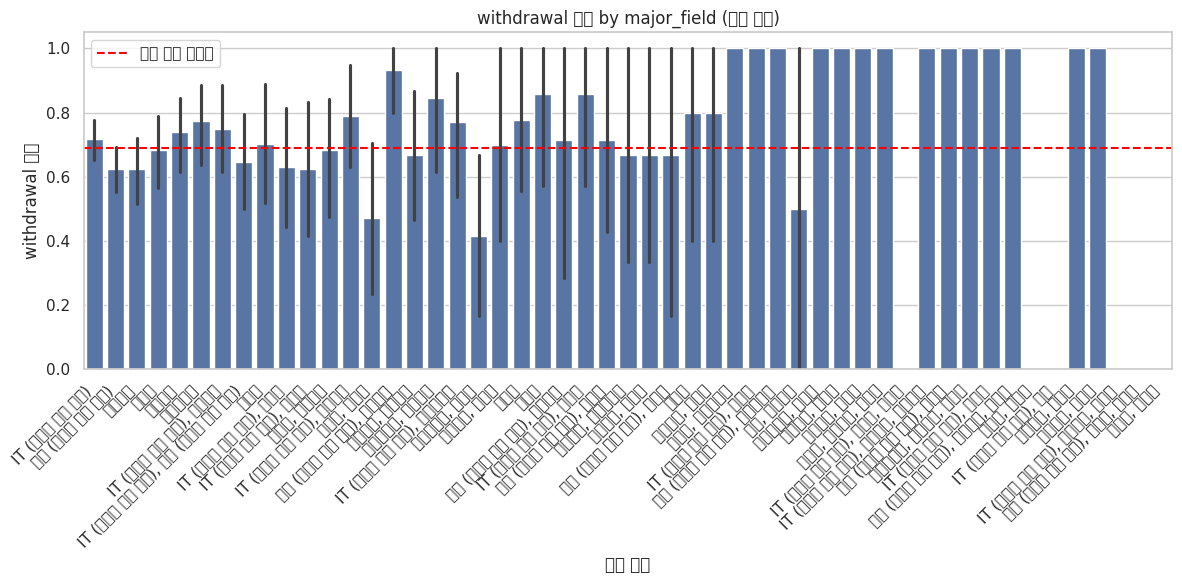

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
order = train_df['major_field'].value_counts().index  # 빈도순 정렬


sns.barplot(data=train_df, x='major_field', y='withdrawal', order=order)
plt.xticks(rotation=45, ha='right')
plt.title("withdrawal 비율 by major_field (전공 분야)")
plt.ylabel("withdrawal 비율")
plt.xlabel("전공 분야")
plt.axhline(0.69, color='red', linestyle='--', label='전체 평균 이탈률')
plt.legend()
plt.tight_layout()
plt.show()

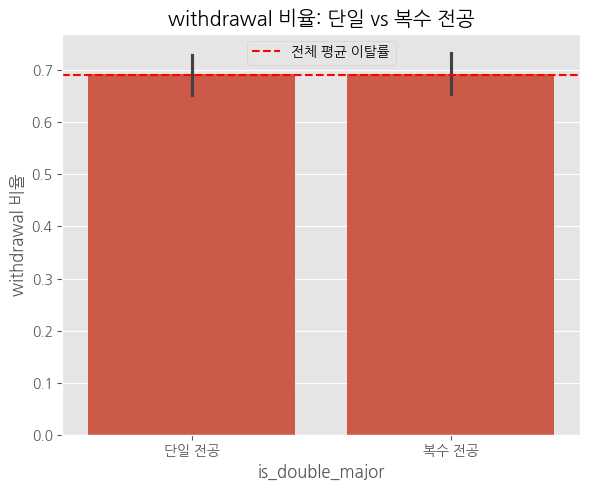

In [15]:
# 먼저 복수 전공 여부 컬럼 생성
train_df['is_double_major'] = train_df['major1_2'].notna().astype(int) # notna() -> 누락값 확인 없 -> f

plt.figure(figsize=(6, 5))
sns.barplot(data=train_df, x='is_double_major', y='withdrawal')
plt.xticks([0, 1], ['단일 전공', '복수 전공'])
plt.title("withdrawal 비율: 단일 vs 복수 전공")
plt.ylabel("withdrawal 비율")
plt.axhline(0.69, color='red', linestyle='--', label='전체 평균 이탈률')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
summary = train_df.groupby(['major_field', 'is_double_major'])['withdrawal'].agg(['count', 'mean']).reset_index()
summary.sort_values(by='count', ascending=False)

,major_field,is_double_major,count,mean
0,IT (컴퓨터 공학 포함),0,161,0.701863
36,공학 (컴퓨터 공학 제외),0,142,0.612676
61,자연과학,0,67,0.671642
20,경영학,0,59,0.711864
18,"IT (컴퓨터 공학 포함), 자연과학",1,42,0.761905
...,...,...,...,...
44,"공학 (컴퓨터 공학 제외), 예체능",1,1,1.000000
40,"공학 (컴퓨터 공학 제외), 경영학, 교육학",1,1,0.000000
58,의약학,1,1,1.000000
65,"자연과학, 교육학",1,1,1.000000


In [17]:
train_df['major type'].unique()

array(['단일 전공', '복수 전공 ( 다중전공, 이중전공 포함 )', nan], dtype=object)

In [18]:
train_df['major_field'].value_counts()

major_field
IT (컴퓨터 공학 포함)                    202
공학 (컴퓨터 공학 제외)                    183
자연과학                               93
경영학                                76
사회과학                               65
경제통상학                              44
IT (컴퓨터 공학 포함), 자연과학               44
IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)     34
인문학                                27
IT (컴퓨터 공학 포함), 경영학                27
IT (컴퓨터 공학 포함), 인문학                24
IT (컴퓨터 공학 포함), 사회과학               19
경영학, 사회과학                          19
경영학, 인문학                           17
공학 (컴퓨터 공학 제외), 자연과학               15
자연과학, 사회과학                         15
IT (컴퓨터 공학 포함), 경제통상학              13
경제통상학, 사회과학                        13
경제통상학, 인문학                         12
사회과학, 인문학                          10
의약학                                 9
교육학                                 7
공학 (컴퓨터 공학 제외), 경영학                 7
공학 (컴퓨터 공학 제외), 사회과학                7
IT (컴퓨터 공학 포함), 교육학                 7
자연과학, 경제통상학                         6


In [19]:
train_df.is_double_major

0       0
1       1
2       0
3       0
4       1
       ..
1051    1
1052    0
1053    1
1054    0
1055    1
Name: is_double_major, Length: 1056, dtype: int64

In [20]:
import pandas as pd
train_df['is_double_major'] = train_df['major type'].apply(lambda x: 1 if '복수' in str(x) else 0)

# 2. major_field에서 10개 미만인 항목을 '기타'로 묶기
field_counts = train_df['major_field'].value_counts()
rare_fields = field_counts[field_counts < 10].index
train_df['major_field_cleaned'] = train_df['major_field'].replace(rare_fields, '기타')

# 3. One-hot 인코딩 (전공 대분류)
major_field_ohe = pd.get_dummies(train_df['major_field_cleaned'], prefix='major_field')

# 4. 전처리된 전공 관련 피처 통합
train_df = pd.concat([train_df, major_field_ohe], axis=1)

# 5. 전처리 후 불필요한 컬럼 제거 (선택)
train_df.drop(columns=['major1_1', 'major1_2', 'major_field', 'major_field_cleaned'], inplace=True)

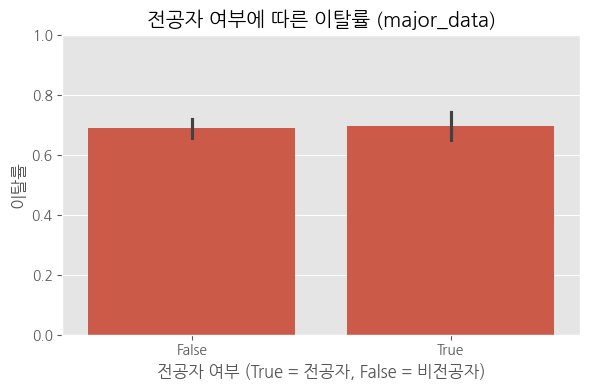

In [21]:
plt.figure(figsize=(6, 4))
sns.barplot(data=train_df, x='major_data', y='withdrawal')
plt.title("전공자 여부에 따른 이탈률 (major_data)")
plt.xlabel("전공자 여부 (True = 전공자, False = 비전공자)")
plt.ylabel("이탈률")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [6]:
train.columns

Index(['ID', 'generation', 'school1', 'major type', 'major1_1', 'major1_2',
       'major_data', 'job', 'class1', 'class2', 'class3', 'class4',
       're_registration', 'contest_award', 'nationality', 'inflow_route',
       'whyBDA', 'what_to_gain', 'hope_for_group', 'previous_class_3',
       'previous_class_4', 'previous_class_5', 'previous_class_6',
       'previous_class_7', 'major_field', 'desired_career_path',
       'completed_semester', 'project_type', 'time_input', 'desired_job',
       'certificate_acquisition', 'desired_certificate',
       'certificate_study_period', 'desired_job_except_data',
       'incumbents_level', 'incumbents_lecture', 'incumbents_company_level',
       'incumbents_lecture_type', 'incumbents_lecture_scale',
       'incumbents_lecture_scale_reason', 'interested_company',
       'expected_domain', 'contest_participitation', 'idea_contest',
       'onedayclass_topic', 'withdrawal'],
      dtype='object')

In [22]:
# 전공 관련 끝

job
대학생     985
취준생      43
직장인      14
대학원생     14
Name: count, dtype: int64


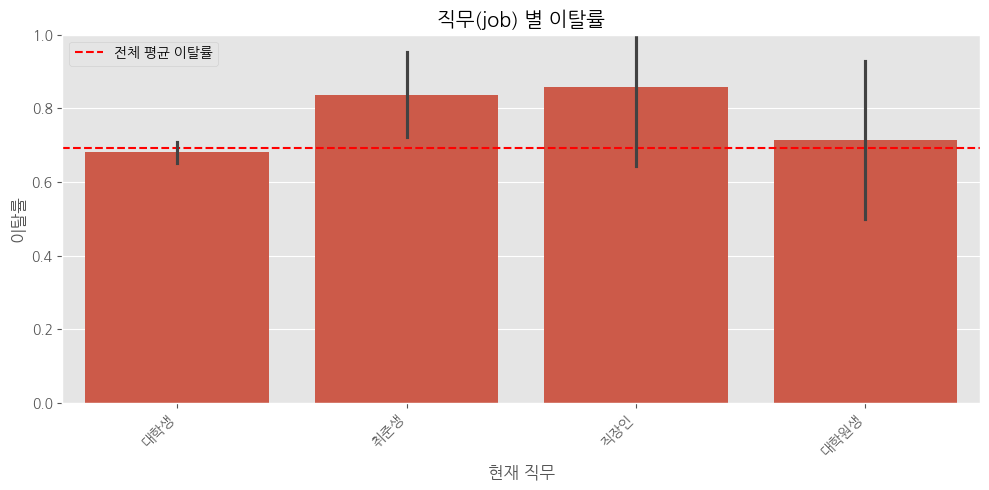

In [5]:
# 직업 -> 꽤 이탈률이 차이가 남 -> 원핫으로 진행

import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
print(train.job.value_counts())

# Step 1: 'job' 컬럼 이탈률 시각화
plt.figure(figsize=(10, 5))
job_order = train['job'].value_counts().index  # 빈도순 정렬
plt.axhline(train['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
sns.barplot(data=train, x='job', y='withdrawal', order=job_order)
plt.xticks(rotation=45, ha='right')
plt.title("직무(job) 별 이탈률")
plt.ylabel("이탈률")
plt.xlabel("현재 직무")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [24]:
job_ohe = pd.get_dummies(train_df['job'], prefix='job')
train_df = pd.concat([train_df, job_ohe], axis=1)
train_df.drop(columns=['job'], inplace=True)

In [25]:
# 전체 이탈률
overall_rate = train_df['withdrawal'].mean()

# re_registration 별 이탈률
by_re = train_df.groupby('re_registration')['withdrawal'].mean()

print("전체 이탈률:", overall_rate)
print(by_re)


전체 이탈률: 0.6912878787878788
re_registration
아니요    0.636467
예      0.971098
Name: withdrawal, dtype: float64


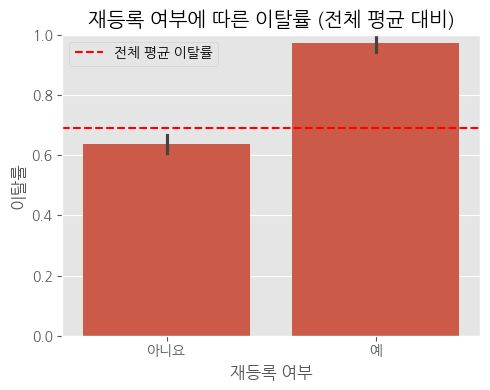

In [26]:
# 재등록 여부 시각화 (이탈률 + 전체 평균 기준선 추가)
plt.figure(figsize=(5, 4))
sns.barplot(data=train_df, x='re_registration', y='withdrawal')
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title("재등록 여부에 따른 이탈률 (전체 평균 대비)")
plt.xlabel("재등록 여부")
plt.ylabel("이탈률")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
train_df.re_registration.value_counts(normalize=True) # 학기당 새로운 학회원을 모집할 때 재등록 여부

re_registration
아니요    0.836174
예      0.163826
Name: proportion, dtype: float64

In [28]:
# 외국인 비율 4개 --> 삭제 
train_df[train_df.nationality == "외국인"]

,ID,major type,major_data,re_registration,nationality,inflow_route,whyBDA,what_to_gain,hope_for_group,desired_career_path,...,major_field_기타,major_field_사회과학,"major_field_사회과학, 인문학",major_field_인문학,major_field_자연과학,"major_field_자연과학, 사회과학",job_대학생,job_대학원생,job_직장인,job_취준생
178,TRAIN_0178,단일 전공,False,아니요,외국인,에브리타임,혼자 공부하기 어려워서,데이터 분석 역량,아니요. 개인적으로 학회 활동을 하고 싶어요,대학원 진학,...,True,False,False,False,False,False,True,False,False,False
362,TRAIN_0362,단일 전공,True,아니요,외국인,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 오프라인으로 참여하고 싶어요,대학원 진학,...,False,False,False,False,False,False,True,False,False,False
694,TRAIN_0694,단일 전공,True,아니요,외국인,에브리타임,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",프로젝트 경험,네. 온라인으로 참여하고 싶어요,취업,...,False,False,False,False,False,False,False,True,False,False
855,TRAIN_0855,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,외국인,인스타그램,혼자 공부하기 어려워서,데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,취업,...,False,False,False,False,False,False,True,False,False,False


In [29]:
train_df.shape

(1056, 54)

In [30]:
train_df = train_df[train_df['nationality'] != '외국인'].reset_index(drop=True) # 외국인 컬럼 제거
train_df.drop(columns=['nationality'], inplace=True) # 내국인도 필요 x

In [31]:
# 1. whyBDA 항목 개수 보기
why_counts = train_df['whyBDA'].value_counts()
why_counts

whyBDA
혼자 공부하기 어려워서                                         585
BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)    172
현직자의 강의를 듣고 싶어서                                      124
시간적으로 부담이 없어서                                         85
학회 가입 시 코딩 테스트, 면접 등을 보지 않아서                          77
큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서                     7
이전 기수에 매우 만족해서                                         2
Name: count, dtype: int64

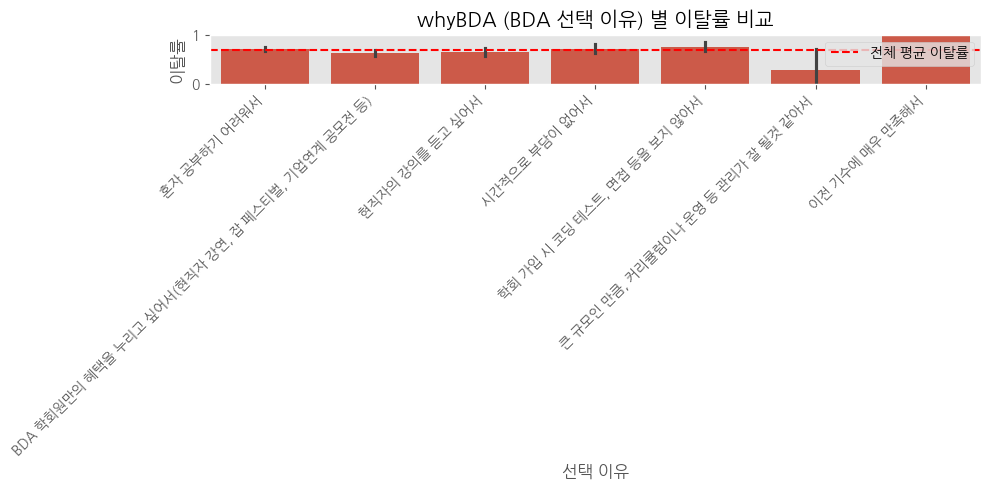

In [32]:
# 2. whyBDA 항목별 이탈률 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=train_df, x='whyBDA', y='withdrawal', order=why_counts.index)
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.xticks(rotation=45, ha='right')
plt.title("whyBDA (BDA 선택 이유) 별 이탈률 비교")
plt.ylabel("이탈률")
plt.xlabel("선택 이유")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
train_df.certificate_acquisition

0             없음
1             없음
2             없음
3        컴퓨터활용능력
4           SQLD
          ...   
1047          없음
1048      정보처리기사
1049          없음
1050    구글 애널리스트
1051          없음
Name: certificate_acquisition, Length: 1052, dtype: object

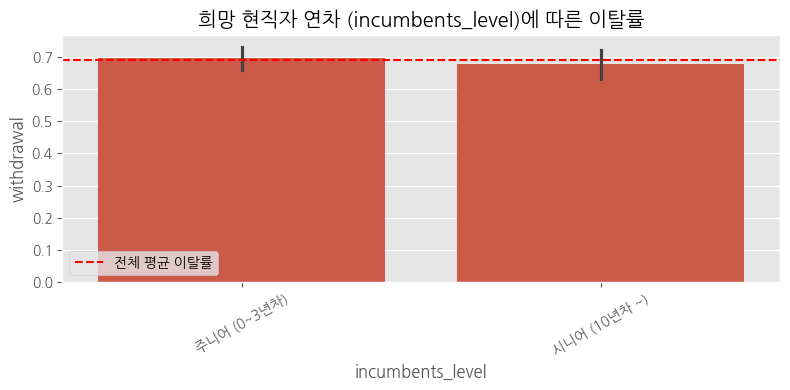

In [41]:
processed_df=train_df.copy()

# 다음 5개 항목 처리
import matplotlib.pyplot as plt
import seaborn as sns

"""
certificate_acquisition : 취득한 자격증
desired_certificate : 취득을 희망하는 자격증
certificate_study_period : 원하는 자격증 스터디 기간
"""

# 6. certificate_acquisition → 결측치 많고 종류 다양 → 삭제
train_df.drop(columns=['certificate_acquisition'], inplace=True)

# 7-8. desired_certificate, certificate_study_period → 결측치 많고 희망성 응답 → 삭제
train_df.drop(columns=['desired_certificate', 'certificate_study_period'], inplace=True)

# 10. incumbents_level → 이탈률 시각화 먼저
plt.figure(figsize=(8, 4))
sns.barplot(data=processed_df, x='incumbents_level', y='withdrawal')
plt.xticks(rotation=30)
plt.axhline(processed_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title("희망 현직자 연차 (incumbents_level)에 따른 이탈률")
plt.tight_layout()
plt.legend()
plt.show()

# 10. incumbents_level → 원핫 인코딩        
level_ohe = pd.get_dummies(processed_df['incumbents_level'], prefix='incumbent_level')
processed_df = pd.concat([processed_df, level_ohe], axis=1)
processed_df.drop(columns=['incumbents_level'], inplace=True)

# 일부 결과 확인

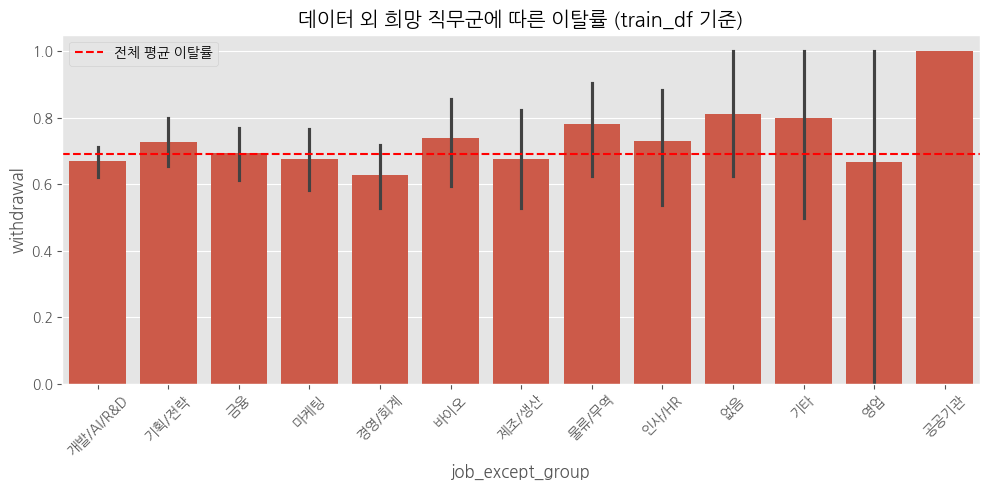

In [40]:
# 동일한 처리를 train_df 기준으로 다시 적용

# 결측치 처리
train_df['desired_job_except_data'] = train_df['desired_job_except_data'].fillna('없음')

# 그룹핑 함수 정의
def group_desired_job(text):
    if any(keyword in text for keyword in ['AI', '개발', '보안', 'R&D']):
        return '개발/AI/R&D'
    elif any(keyword in text for keyword in ['기획', '전략']):
        return '기획/전략'
    elif any(keyword in text for keyword in ['마케팅', '광고', 'MD']):
        return '마케팅'
    elif any(keyword in text for keyword in ['금융', '보험', '퀀트']):
        return '금융'
    elif any(keyword in text for keyword in ['경영', '회계', '세무']):
        return '경영/회계'
    elif any(keyword in text for keyword in ['제조', '생산']):
        return '제조/생산'
    elif any(keyword in text for keyword in ['바이오', '바이오인포매틱스']):
        return '바이오'
    elif any(keyword in text for keyword in ['물류', '무역']):
        return '물류/무역'
    elif any(keyword in text for keyword in ['인사', 'HR']):
        return '인사/HR'
    elif any(keyword in text for keyword in ['영업']):
        return '영업'
    elif any(keyword in text for keyword in ['공공기관']):
        return '공공기관'
    elif text.strip() in ['없음', '-', '모르겠음']:
        return '없음'
    else:
        return '기타'

# 적용
train_df['job_except_group'] = train_df['desired_job_except_data'].apply(group_desired_job)

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=train_df, x='job_except_group', y='withdrawal',
            order=train_df['job_except_group'].value_counts().index)
plt.xticks(rotation=45)
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title("데이터 외 희망 직무군에 따른 이탈률 (train_df 기준)")
plt.tight_layout()
plt.legend()
plt.show()

# 원핫 인코딩
job_except_ohe = pd.get_dummies(train_df['job_except_group'], prefix='except_job')
train_df = pd.concat([train_df, job_except_ohe], axis=1)
train_df.drop(columns=['desired_job_except_data', 'job_except_group'], inplace=True)



In [ ]:
train.desired_job_except_data

In [45]:
train_df.shape

(1052, 63)

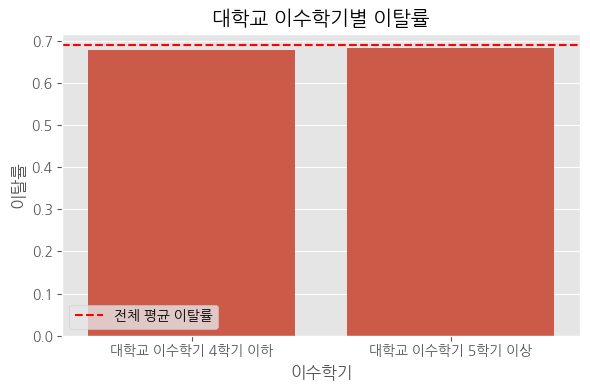

In [57]:
# 이탈률 시각화용 데이터프레임 생성
semester_rate_df = (
    train_df.groupby('completed_semester')['withdrawal']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'withdrawal_rate', 'count': 'count'})
    .reset_index()
)

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=semester_rate_df, x='completed_semester', y='withdrawal_rate')
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title("대학교 이수학기별 이탈률")
plt.ylabel("이탈률")
plt.xlabel("이수학기")
plt.tight_layout()
plt.legend()
plt.show()


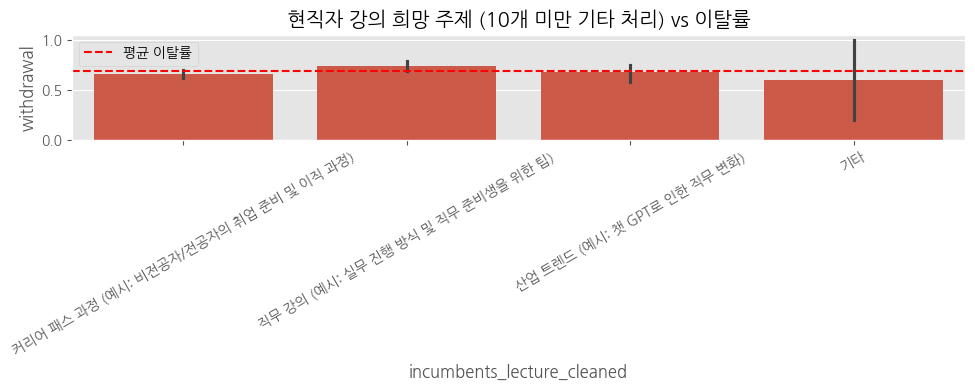

In [63]:
# 1. 각 값별 빈도수 확인
lecture_counts = train_df['incumbents_lecture'].value_counts()

# 2. 기준: 10개 미만은 '기타'로 묶기
rare_lecture = lecture_counts[lecture_counts < 10].index
train_df['incumbents_lecture_cleaned'] = train_df['incumbents_lecture'].replace(rare_lecture, '기타')

# 3. 시각화로 확인
plt.figure(figsize=(10, 4))
sns.barplot(
    data=train_df,
    x='incumbents_lecture_cleaned',
    y='withdrawal',
    order=train_df['incumbents_lecture_cleaned'].value_counts().index
)
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='평균 이탈률')
plt.xticks(rotation=30)
plt.title("현직자 강의 희망 주제 (10개 미만 기타 처리) vs 이탈률")
plt.tight_layout()
plt.legend()
plt.show()


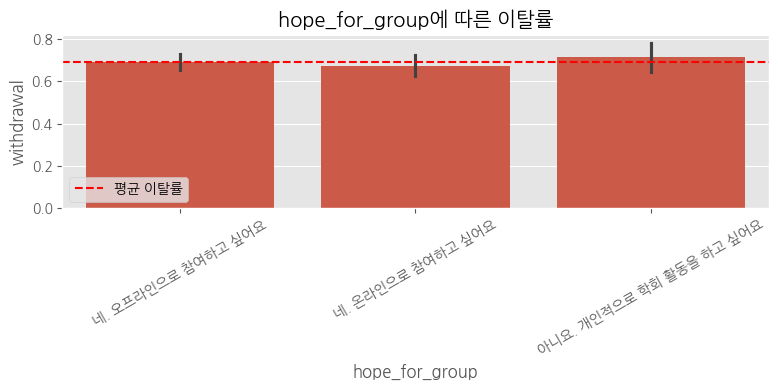

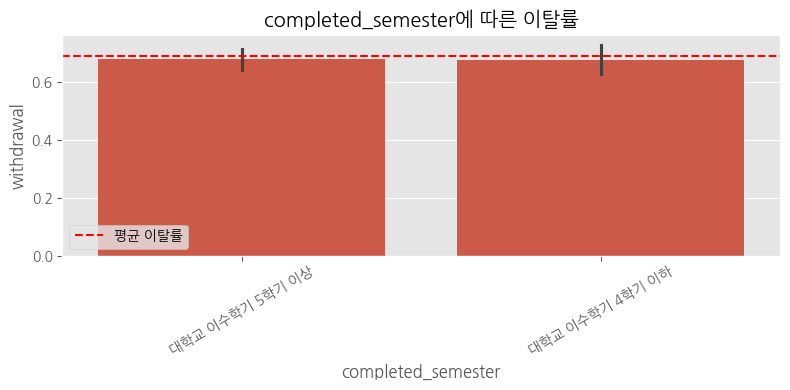

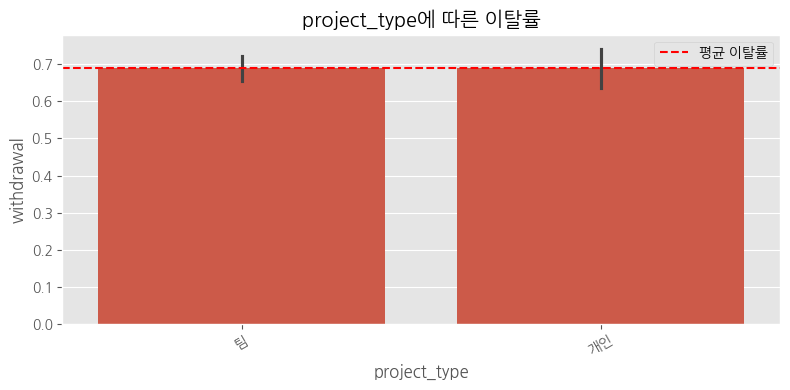

In [88]:
# 시각화 + 원핫 인코딩 처리

columns_to_process = ['hope_for_group', 'completed_semester', 'project_type']
prefixes = ['group', 'semester', 'project']

# 시각화 먼저
for col in columns_to_process:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=train_df, x=col, y='withdrawal', order=train_df[col].value_counts().index)
    plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='평균 이탈률')
    plt.title(f"{col}에 따른 이탈률")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.legend()
    plt.show()

# 전처리 (원핫 인코딩)
for col, prefix in zip(columns_to_process, prefixes):
    dummies = pd.get_dummies(train_df[col], prefix=prefix)
    train_df = pd.concat([train_df, dummies], axis=1)
    train_df.drop(columns=[col], inplace=True)


In [87]:
train_df.project_type.value_counts()

project_type
팀     751
개인    290
Name: count, dtype: int64

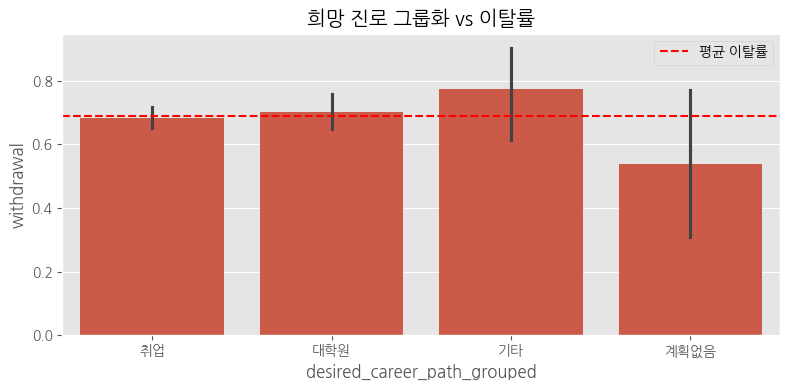

desired_career_path_grouped
취업      752
대학원     256
기타       31
계획없음     13
Name: count, dtype: int64

In [ ]:
import pandas as pd


# desired_career_path 그룹 분류 함수 정의
def classify_career(text):
    if pd.isna(text):
        return '기타'
    if any(word in text for word in ['대학원']):
        return '대학원'
    if any(word in text for word in ['취업', '취업준비', '취업예정']):
        return '취업'
    if any(word in text for word in ['계획없음', '모르겠음', '미정']):
        return '계획없음'
    return '기타'

# 적용
train_df['desired_career_path_grouped'] = train_df['desired_career_path'].apply(classify_career)

# 이탈률 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(data=train_df, x='desired_career_path_grouped', y='withdrawal', order=train_df['desired_career_path_grouped'].value_counts().index)
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='평균 이탈률')
plt.title("희망 진로 그룹화 vs 이탈률")
plt.tight_layout()
plt.legend()
plt.show()

# 확인
train_df['desired_career_path_grouped'].value_counts()


In [83]:
# desired_career_path_grouped 컬럼 원핫 인코딩
career_ohe = pd.get_dummies(train_df['desired_career_path_grouped'], prefix='career_group')

# 병합 후 불필요한 컬럼 제거
train_df = pd.concat([train_df, career_ohe], axis=1)
train_df.drop(columns=['desired_career_path', 'desired_career_path_grouped'], inplace=True)

# 결과 미리보기
train_df.head(3)

,ID,major type,major_data,re_registration,inflow_route,whyBDA,what_to_gain,hope_for_group,completed_semester,project_type,...,except_job_바이오,except_job_없음,except_job_영업,except_job_인사/HR,except_job_제조/생산,incumbents_lecture_cleaned,career_group_계획없음,career_group_기타,career_group_대학원,career_group_취업
0,TRAIN_0000,단일 전공,False,아니요,에브리타임,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",프로젝트 경험,네. 오프라인으로 참여하고 싶어요,대학교 이수학기 4학기 이하,팀,...,False,False,False,False,False,커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),False,False,False,True
1,TRAIN_0001,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 오프라인으로 참여하고 싶어요,대학교 이수학기 5학기 이상,팀,...,False,False,False,False,False,직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),False,False,False,True
2,TRAIN_0002,단일 전공,True,아니요,에브리타임,혼자 공부하기 어려워서,데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,대학교 이수학기 4학기 이하,팀,...,False,False,False,False,False,커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),False,False,False,True


In [89]:
train_df.shape

(1052, 71)

In [78]:
train_df.shape

(1052, 64)

In [69]:
train_df.project_type.value_counts()

project_type
팀     751
개인    290
Name: count, dtype: int64

In [64]:
train_df.hope_for_group

0       네. 오프라인으로 참여하고 싶어요
1       네. 오프라인으로 참여하고 싶어요
2       네. 오프라인으로 참여하고 싶어요
3        네. 온라인으로 참여하고 싶어요
4       네. 오프라인으로 참여하고 싶어요
               ...        
1047     네. 온라인으로 참여하고 싶어요
1048     네. 온라인으로 참여하고 싶어요
1049    네. 오프라인으로 참여하고 싶어요
1050     네. 온라인으로 참여하고 싶어요
1051    네. 오프라인으로 참여하고 싶어요
Name: hope_for_group, Length: 1052, dtype: object

In [58]:
# inflow_route,completed_semester,time_input

NameError: name 'inflow_route' is not defined

In [95]:
train_df.columns

Index(['ID', 'major type', 'major_data', 're_registration', 'inflow_route',
       'whyBDA', 'what_to_gain', 'time_input', 'desired_job',
       'incumbents_level', 'incumbents_lecture', 'incumbents_company_level',
       'incumbents_lecture_type', 'incumbents_lecture_scale',
       'incumbents_lecture_scale_reason', 'interested_company',
       'expected_domain', 'onedayclass_topic', 'withdrawal', 'is_double_major',
       'major_field_IT (컴퓨터 공학 포함)', 'major_field_IT (컴퓨터 공학 포함), 경영학',
       'major_field_IT (컴퓨터 공학 포함), 경제통상학',
       'major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)',
       'major_field_IT (컴퓨터 공학 포함), 사회과학', 'major_field_IT (컴퓨터 공학 포함), 인문학',
       'major_field_IT (컴퓨터 공학 포함), 자연과학', 'major_field_경영학',
       'major_field_경영학, 사회과학', 'major_field_경영학, 인문학', 'major_field_경제통상학',
       'major_field_경제통상학, 사회과학', 'major_field_경제통상학, 인문학',
       'major_field_공학 (컴퓨터 공학 제외)', 'major_field_공학 (컴퓨터 공학 제외), 자연과학',
       'major_field_기타', 'major_field_사회과학', 'major_field_사회

In [90]:
train_df.isnull().sum()

ID                                0
major type                        7
major_data                        0
re_registration                   0
inflow_route                      0
                                 ..
group_아니요. 개인적으로 학회 활동을 하고 싶어요    0
semester_대학교 이수학기 4학기 이하          0
semester_대학교 이수학기 5학기 이상          0
project_개인                        0
project_팀                         0
Length: 71, dtype: int64

In [ ]:
# 기존 컬럼 복구 및 새로운 기준 설정을 위한 사전 처리
train_df['time_input'] = processed_df['time_input']  # 원본에서 복원

# 1. 3단계로 나누기 (0~4, 4~8, 8시간 초과)
def categorize_time(hour):
    try:
        h = float(hour)
        if h <= 4:
            return "0~4시간"
        elif h <= 8:
            return "4~8시간"
        else:
            return "8시간 초과"
    except:
        return "기타"

train_df['time_category'] = train_df['time_input'].apply(categorize_time)

# 2. 시각화: 카테고리별 이탈률
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(data=train_df, x='time_category', y='withdrawal')
plt.title("BDA 투입 시간대별 이탈률")
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.tight_layout()
plt.legend()
plt.show()

# 3. 원핫 인코딩
time_ohe = pd.get_dummies(train_df['time_category'], prefix='time')
train_df = pd.concat([train_df, time_ohe], axis=1)

# 불필요 컬럼 제거
train_df.drop(columns=['time_input', 'time_category'], inplace=True)

KeyError: 'time_input'

In [97]:
train_df.time_input

0       4.5
1       2.0
2       3.0
3       2.0
4       1.5
       ... 
1047    2.0
1048    2.0
1049    3.0
1050    7.0
1051    2.0
Name: time_input, Length: 1052, dtype: float64

In [105]:
train_df.drop(columns={"inflow_route"},inplace=True)

In [116]:
train_df.columns

Index(['ID', 'major type', 'major_data', 're_registration', 'whyBDA',
       'what_to_gain', 'desired_job', 'incumbents_lecture',
       'incumbents_company_level', 'incumbents_lecture_type',
       'incumbents_lecture_scale', 'incumbents_lecture_scale_reason',
       'interested_company', 'expected_domain', 'onedayclass_topic',
       'withdrawal', 'is_double_major', 'major_field_IT (컴퓨터 공학 포함)',
       'major_field_IT (컴퓨터 공학 포함), 경영학', 'major_field_IT (컴퓨터 공학 포함), 경제통상학',
       'major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)',
       'major_field_IT (컴퓨터 공학 포함), 사회과학', 'major_field_IT (컴퓨터 공학 포함), 인문학',
       'major_field_IT (컴퓨터 공학 포함), 자연과학', 'major_field_경영학',
       'major_field_경영학, 사회과학', 'major_field_경영학, 인문학', 'major_field_경제통상학',
       'major_field_경제통상학, 사회과학', 'major_field_경제통상학, 인문학',
       'major_field_공학 (컴퓨터 공학 제외)', 'major_field_공학 (컴퓨터 공학 제외), 자연과학',
       'major_field_기타', 'major_field_사회과학', 'major_field_사회과학, 인문학',
       'major_field_인문학', 'major_field_자연과학', '

In [117]:
train_df.whyBDA.value_counts()
학회 가입 시 코딩 테스트, 면접 등을 보지 않아서  + BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)
혼자 공부하기 어려워서 + 큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서 + 이전 기수에 매우 만족해서
현직자의 강의를 듣고 싶어서 


whyBDA
혼자 공부하기 어려워서                                         585
BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)    172
현직자의 강의를 듣고 싶어서                                      124
시간적으로 부담이 없어서                                         85
학회 가입 시 코딩 테스트, 면접 등을 보지 않아서                          77
큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서                     7
이전 기수에 매우 만족해서                                         2
Name: count, dtype: int64

In [118]:
train_df.what_to_gain.value_counts()
데이터 분석 역량 이거랑 인적 네트워크랑 나머지 묶어주고

what_to_gain
데이터 분석 역량           682
프로젝트 경험             213
공모전 경험               99
인적 네트워크              42
위 4항목 전부              1
모두                    1
공모전, 프로젝트 경험 둘 다      1
자격증 공부                1
파이썬 실력                1
Name: count, dtype: int64

In [121]:
train_df.desired_job.unique()

array(['데이터 엔지니어', '인공지능 전문가', '데이터 분석가', '자연과학계열 연구자, 데이터 분석가',
       '데이터 사이언티스트', '아직은 직무에 관해서 확실하게 정하지않아서 학회수업과 전공들으면서 생각해볼 예정입니다.',
       '아직 미정', '소프트웨어 개발자', '자연과학계열 연구자', '계리사', '경영컨설턴트', '마케터',
       '퀀트 리서처/에널리스트', '잘 모르겠다', '해외영업', 'PM/서비스 기획자', '사회과학계열 연구자',
       'DB관리자', '영업', nan, 'SCM', '파이낸셜 애널리틱스', '컨설팅', '확실하지 않아요',
       'UX/UI 디자이너', '아직 정하지 못함', '문화유산연구원', '경영 데이터', '전산직', '반도체 엔지니어',
       '아직 고민 중', '공정기술 엔지니어', '고민중', '레이더와 관련된 데이터 분석가', 'MD', '미정',
       '반도체공정엔지니어', '아직 확고하게 결정한 건 없지만 은행에서 일하고 싶습니다.', '퍼포먼스 마케터', '퀀트',
       '기계공학 엔지니어', '금융공기업 A매치 전산직렬', '아직 고민 중이니다',
       '삼성전자 평가및분석 엔지니어 (PE팀)',
       '아직 잘 모르겠다. DE, DA에 가까운 것 같으나, 현업에서 어느정도의 차이가 있는지 모르겠음.', '회계사',
       '대학교 입학사정관', '오퍼레이션 분야', '품질관리', '화학공학 엔지니어', '아직 모름',
       '환경안전관리 또는 설계', 'HR', '펀드매니저', 'HR 애널리틱스', 'Scm 직무', 'scm 담당자',
       '웹디자인', '머신러닝을 도입한 품질관리 업계에서의 종사', '고민', '교통관련 직무', '편성', '설비',
       '모르겠다', '아직 못 정함', '데이터분석가, PM', '인사직무',
       '인공지능 전문가를 목표로 하나 현재 ux 쪽 

In [130]:
import numpy as np

# 복사본 생성
# processed_df = train_df.copy()

# -------------------------
# 1. whyBDA 그룹화
# -------------------------

def simplify_whyBDA(x):
    if '코딩 테스트' in x or '잡 페스티벌' in x:
        return '혜택 목적'
    elif '혼자 공부' in x or '커리큘럼' in x or '만족' in x:
        return '혼자 어려움/기수 추천'
    elif '현직자' in x:
        return '현직자 강의'
    else:
        return '기타'

train_df['whyBDA_grouped'] = train_df['whyBDA'].fillna('기타').apply(simplify_whyBDA)

# -------------------------
# 2. what_to_gain 그룹화
# -------------------------

def simplify_gain(x):
    if pd.isnull(x):
        return '기타'
    elif '데이터 분석' in x:
        return '데이터 분석 역량'
    elif '인적' in x or '사람' in x:
        return '인적 네트워크'
    else:
        return '기타'

train_df['what_to_gain_grouped'] = train_df['what_to_gain'].fillna('기타').apply(simplify_gain)

# -------------------------
# 3. desired_job 그룹화
# -------------------------

def simplify_desired_job(x):
    if pd.isnull(x):
        return '기타'
    elif any(word in x for word in ['AI', '데이터', 'Data', 'NLP', '분석']):
        return '데이터/AI'
    elif any(word in x for word in ['개발', '엔지니어', 'R&D', '공정']):
        return '엔지니어/개발'
    elif any(word in x for word in ['마케터', '광고', '기획', 'UX', '디자인', '퍼포먼스']):
        return '마케팅/기획'
    elif any(word in x for word in ['HR', '인사', '회계', '경영', '세무']):
        return '경영/인사'
    elif any(word in x for word in ['금융', '펀드', '은행', '퀀트']):
        return '금융'
    elif any(word in x for word in ['모르', '아직', '미정', '잘']):
        return '미정'
    else:
        return '기타'

train_df['desired_job_grouped'] = train_df['desired_job'].fillna('기타').apply(simplify_desired_job)



In [151]:
whyBDA_ohe = pd.get_dummies(train_df['whyBDA_grouped'], prefix='whyBDA')
gain_ohe = pd.get_dummies(train_df['what_to_gain_grouped'], prefix='gain')
job_ohe = pd.get_dummies(train_df['desired_job_grouped'], prefix='job')

train_df = pd.concat([train_df, whyBDA_ohe, gain_ohe, job_ohe], axis=1)

# 5. 불필요한 컬럼 제거
train_df.drop(columns=['whyBDA', 'what_to_gain', 'desired_job',
                       'whyBDA_grouped', 'what_to_gain_grouped', 'desired_job_grouped',
                       'incumbents_lecture', 'onedayclass_topic'], inplace=True)

In [153]:
train_df.shape

(1052, 86)

In [ ]:
major_field_ohe = pd.get_dummies(train_df['major_field_cleaned'], prefix='major_field')


In [125]:
train_df.incumbents_lecture.value_counts()

커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)    553
직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)        363
산업 트렌드 (예시: 챗 GPT로 인한 직무 변화)               120

아래껀 -----> 직무 강의로 넣어줘
위 항목 셋 다                                     1
가능하면 3개 다 듣고 싶어요!                            1
다 듣고 싶습니다!                                   1
커리어패스과정 및 직무 강의                              1
연구직에서 활용하는 머신러닝의 트렌드                         1


incumbents_lecture
커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)    553
직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)        363
산업 트렌드 (예시: 챗 GPT로 인한 직무 변화)               120
위 항목 셋 다                                     1
가능하면 3개 다 듣고 싶어요!                            1
다 듣고 싶습니다!                                   1
커리어패스과정 및 직무 강의                              1
연구직에서 활용하는 머신러닝의 트렌드                         1
Name: count, dtype: int64

In [137]:
# 기존 결과 반영하기 위해 복사본 사용
df = train_df.copy()

# incumbents_lecture 값 정제 및 그룹화 함수
def group_lecture(value):
    if value in ['커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)']:
        return '커리어 패스 과정'
    elif value in ['직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)',
                   '위 항목 셋 다', '가능하면 3개 다 듣고 싶어요!',
                   '다 듣고 싶습니다!', '커리어패스과정 및 직무 강의']:
        return '직무 강의'
    elif value in ['산업 트렌드 (예시: 챗 GPT로 인한 직무 변화)',
                   '연구직에서 활용하는 머신러닝의 트렌드']:
        return '산업 트렌드'
    else:
        return '기타'

train_df['incumbents_lecture_cleaned'] = train_df['incumbents_lecture'].apply(group_lecture)

# 빈도 확인
train_df['incumbents_lecture_cleaned'].value_counts()


incumbents_lecture_cleaned
커리어 패스 과정    553
직무 강의        367
산업 트렌드       121
기타            11
Name: count, dtype: int64

In [136]:
train_df.desired_job_grouped.value_counts()

desired_job_grouped
데이터/AI     665
기타         173
마케팅/기획     121
엔지니어/개발     57
미정          23
경영/인사        7
금융           6
Name: count, dtype: int64

In [138]:
# '기타' 항목을 모두 '직무 강의'로 대체
train_df['incumbents_lecture_cleaned'] = train_df['incumbents_lecture_cleaned'].replace('기타', '직무 강의')

# 변경 후 다시 확인
train_df['incumbents_lecture_cleaned'].value_counts()

incumbents_lecture_cleaned
커리어 패스 과정    553
직무 강의        378
산업 트렌드       121
Name: count, dtype: int64

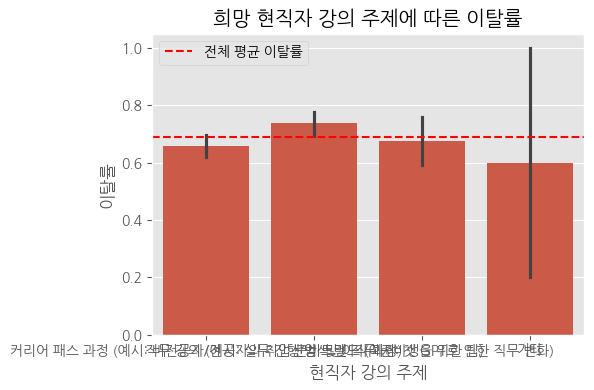

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 복사본에 반영
df['withdrawal'] = train_df['withdrawal']

# 이탈률 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='incumbents_lecture_cleaned', y='withdrawal')
plt.axhline(df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title('희망 현직자 강의 주제에 따른 이탈률')
plt.xlabel('현직자 강의 주제')
plt.ylabel('이탈률')
plt.tight_layout()
plt.legend()
plt.show()

# 원핫 인코딩
lecture_ohe = pd.get_dummies(df['incumbents_lecture_cleaned'], prefix='lecture')
train_df = pd.concat([train_df, lecture_ohe], axis=1)
train_df['incumbents_lecture_cleaned'] = df['incumbents_lecture_cleaned']


In [114]:
train_df.incumbents_lecture.unique()

array(['커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)',
       '직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)',
       '산업 트렌드 (예시: 챗 GPT로 인한 직무 변화)', nan, '위 항목 셋 다',
       '가능하면 3개 다 듣고 싶어요!', '다 듣고 싶습니다!', '커리어패스과정 및 직무 강의',
       '연구직에서 활용하는 머신러닝의 트렌드'], dtype=object)

In [100]:
# 2. incumbents_level → 원핫 인코딩 (이미 있음 여부 확인 후 처리)
if 'incumbents_level' in train_df.columns:
    inc_level_ohe = pd.get_dummies(train_df['incumbents_level'], prefix='incumbent_level')
    train_df = pd.concat([train_df, inc_level_ohe], axis=1)
    train_df.drop(columns=['incumbents_level'], inplace=True)

In [141]:
train_df.shape

(1052, 80)

In [142]:
train_df.desired_job_except_data.value_counts()

AttributeError: 'DataFrame' object has no attribute 'desired_job_except_data'

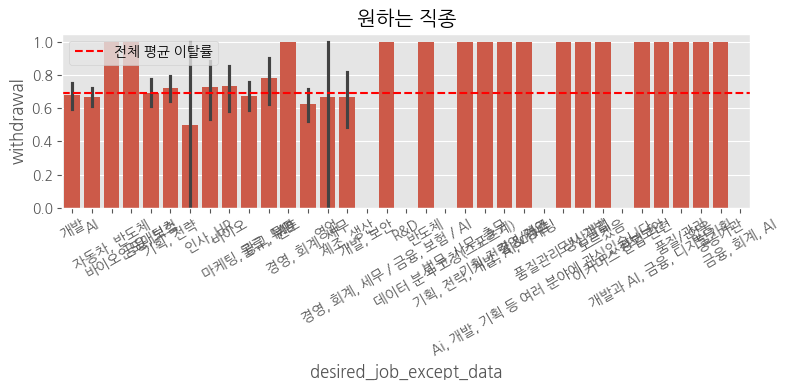

In [39]:
plt.figure(figsize=(8, 4))
sns.barplot(data=train_df, x='desired_job_except_data', y='withdrawal')
plt.xticks(rotation=30)
plt.axhline(train_df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
plt.title("원하는 직종")
plt.tight_layout()
plt.legend()
plt.show()

In [154]:
train_df

,ID,major type,major_data,re_registration,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,...,gain_기타,gain_데이터 분석 역량,gain_인적 네트워크,job_경영/인사,job_금융,job_기타,job_데이터/AI,job_마케팅/기획,job_미정,job_엔지니어/개발
0,TRAIN_0000,단일 전공,False,아니요,"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 많지 않아야 편하게 들을 수 있어서,삼성이나 하이닉스,AI,...,True,False,False,False,False,False,True,False,False,False
1,TRAIN_0001,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",10명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있고 질문 하기 쉽다.,네이버,AI,...,True,False,False,False,False,True,False,False,False,False
2,TRAIN_0002,단일 전공,True,아니요,"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 소수인원은 조금 부담스럽고 너무 많은 인원은 집중도가 떨어질거같아서,스포츠분석 기업,AI,...,False,True,False,False,False,False,True,False,False,False
3,TRAIN_0003,단일 전공,True,아니요,국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 많은 인원이 있을 경우 집중도가 떨어질 거 같습니다.,토스,AI,...,False,True,False,False,False,False,True,False,False,False
4,TRAIN_0004,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,"국내 대기업 IT 계열 (금융, 제조 ...)",오프라인,100명 이상의 리스너와 10명 이상의 현직자,많은 현직자분들의 이야기를 듣고싶어서,네이버 카카오,금융,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,TRAIN_1051,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,1명의 현직자에게 집중하는 게 좋을 것 같아서,대기업 위주로 관심이 있습니다.,금융,...,False,True,False,False,False,False,True,False,False,False
1048,TRAIN_1052,단일 전공,True,예,"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,"사람이 너무 많으면 집중할 수 없고, 너무 적으면 부담스러워서",구글,금융,...,False,True,False,False,False,False,True,False,False,False
1049,TRAIN_1053,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,"국내 대기업 IT 계열 (금융, 제조 ...)",온라인,3~50명 내외의 강의 리스너와 1명의 현직자,온라인은 사람이 너무 많으면 질문을 많이 할 수 없기에 적절한 규모가 필요하다고 생각,JTBC,사회문제,...,False,True,False,False,False,False,True,False,False,False
1050,TRAIN_1054,단일 전공,False,아니요,국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 적으면 예산이 부담될 것 같고 너무 많으면 집중이 안 될 것 같아서 중...,"당근, 토스",금융,...,False,True,False,False,False,False,True,False,False,False


In [143]:
train_df.shape

(1052, 80)

In [ ]:
'incumbents_company_level', 'incumbents_lecture_type',
'incumbents_lecture_scale', 'incumbents_lecture_scale_reason',
'interested_company', 'expected_domain',

In [150]:
train_df.incumbents_lecture_type

0       온,오프라인 동시
1       온,오프라인 동시
2       온,오프라인 동시
3       온,오프라인 동시
4            오프라인
          ...    
1047    온,오프라인 동시
1048    온,오프라인 동시
1049          온라인
1050    온,오프라인 동시
1051    온,오프라인 동시
Name: incumbents_lecture_type, Length: 1052, dtype: object

In [166]:
train_df.drop(columns={"incumbents_lecture_scale","incumbents_company_level"},inplace=True)

In [ ]:
incumbents_lecture_type
interested_company
expected_domain

In [172]:
train_df.drop(columns={"incumbents_lecture_scale_reason"},inplace=True)

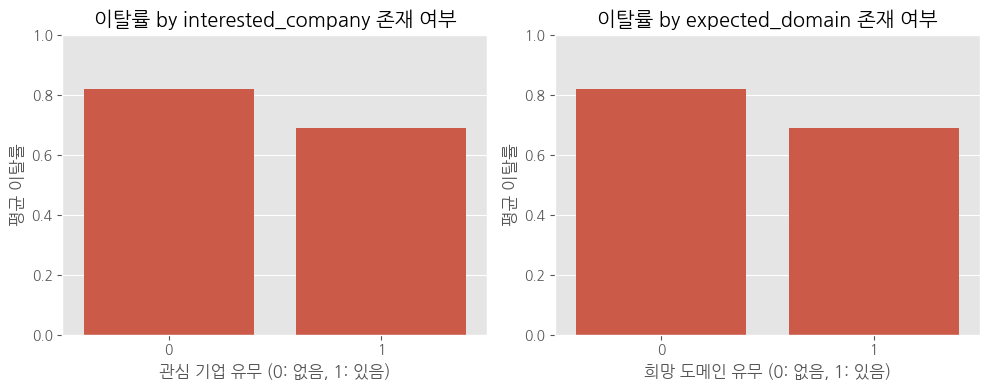

In [174]:
import pandas as pd

original_df = train_df.copy()

# 필요한 두 컬럼만 다시 불러와서 기존 train_df에 붙이기
train_df['interested_company'] = original_df['interested_company']
train_df['expected_domain'] = original_df['expected_domain']

# 결측치를 '관심없음'으로 간주하고 0, 아닌 경우 1로 변환
train_df['interested_company_bool'] = train_df['interested_company'].apply(lambda x: 0 if pd.isna(x) else 1)
train_df['expected_domain_bool'] = train_df['expected_domain'].apply(lambda x: 0 if pd.isna(x) else 1)

# 이탈 여부에 따른 평균 확인
interested_company_withdrawal = train_df.groupby('interested_company_bool')['withdrawal'].mean()
expected_domain_withdrawal = train_df.groupby('expected_domain_bool')['withdrawal'].mean()

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=interested_company_withdrawal.index, y=interested_company_withdrawal.values)
plt.title("이탈률 by interested_company 존재 여부")
plt.xlabel("관심 기업 유무 (0: 없음, 1: 있음)")
plt.ylabel("평균 이탈률")
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(x=expected_domain_withdrawal.index, y=expected_domain_withdrawal.values)
plt.title("이탈률 by expected_domain 존재 여부")
plt.xlabel("희망 도메인 유무 (0: 없음, 1: 있음)")
plt.ylabel("평균 이탈률")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


In [180]:
train_df.columns

Index(['ID', 'major type', 'major_data', 're_registration', 'withdrawal',
       'is_double_major', 'major_field_IT (컴퓨터 공학 포함)',
       'major_field_IT (컴퓨터 공학 포함), 경영학', 'major_field_IT (컴퓨터 공학 포함), 경제통상학',
       'major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)',
       'major_field_IT (컴퓨터 공학 포함), 사회과학', 'major_field_IT (컴퓨터 공학 포함), 인문학',
       'major_field_IT (컴퓨터 공학 포함), 자연과학', 'major_field_경영학',
       'major_field_경영학, 사회과학', 'major_field_경영학, 인문학', 'major_field_경제통상학',
       'major_field_경제통상학, 사회과학', 'major_field_경제통상학, 인문학',
       'major_field_공학 (컴퓨터 공학 제외)', 'major_field_공학 (컴퓨터 공학 제외), 자연과학',
       'major_field_기타', 'major_field_사회과학', 'major_field_사회과학, 인문학',
       'major_field_인문학', 'major_field_자연과학', 'major_field_자연과학, 사회과학',
       'job_대학생', 'job_대학원생', 'job_직장인', 'job_취준생', 'sentiment_score',
       'except_job_개발/AI/R&D', 'except_job_경영/회계', 'except_job_공공기관',
       'except_job_금융', 'except_job_기타', 'except_job_기획/전략', 'except_job_마케팅',
       'except_job_물류/무역',

In [182]:
import pandas as pd

# 불러온 컬럼 리스트
columns = [
    'ID', 'major type', 'major_data', 're_registration', 'withdrawal',
    'is_double_major', 'major_field_IT (컴퓨터 공학 포함)',
    'major_field_IT (컴퓨터 공학 포함), 경영학', 'major_field_IT (컴퓨터 공학 포함), 경제통상학',
    'major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)',
    'major_field_IT (컴퓨터 공학 포함), 사회과학', 'major_field_IT (컴퓨터 공학 포함), 인문학',
    'major_field_IT (컴퓨터 공학 포함), 자연과학', 'major_field_경영학',
    'major_field_경영학, 사회과학', 'major_field_경영학, 인문학', 'major_field_경제통상학',
    'major_field_경제통상학, 사회과학', 'major_field_경제통상학, 인문학',
    'major_field_공학 (컴퓨터 공학 제외)', 'major_field_공학 (컴퓨터 공학 제외), 자연과학',
    'major_field_기타', 'major_field_사회과학', 'major_field_사회과학, 인문학',
    'major_field_인문학', 'major_field_자연과학', 'major_field_자연과학, 사회과학',
    'job_대학생', 'job_대학원생', 'job_직장인', 'job_취준생', 'sentiment_score',
    'except_job_개발/AI/R&D', 'except_job_경영/회계', 'except_job_공공기관',
    'except_job_금융', 'except_job_기타', 'except_job_기획/전략', 'except_job_마케팅',
    'except_job_물류/무역', 'except_job_바이오', 'except_job_없음', 'except_job_영업',
    'except_job_인사/HR', 'except_job_제조/생산', 'incumbents_lecture_cleaned',
    'career_group_계획없음', 'career_group_기타', 'career_group_대학원',
    'career_group_취업', 'group_네. 오프라인으로 참여하고 싶어요',
    'group_네. 온라인으로 참여하고 싶어요', 'group_아니요. 개인적으로 학회 활동을 하고 싶어요',
    'semester_대학교 이수학기 4학기 이하', 'semester_대학교 이수학기 5학기 이상', 'project_개인',
    'project_팀', 'time_0~4시간', 'time_4~8시간', 'time_8시간 초과',
    'incumbent_level_시니어 (10년차 ~)', 'incumbent_level_주니어 (0~3년차)',
    'lecture_기타', 'lecture_산업 트렌드 (예시: 챗 GPT로 인한 직무 변화)',
    'lecture_직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁)',
    'lecture_커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정)', 'whyBDA_기타',
    'whyBDA_현직자 강의', 'whyBDA_혜택 목적', 'whyBDA_혼자 어려움/기수 추천', 'gain_기타',
    'gain_데이터 분석 역량', 'gain_인적 네트워크', 'job_경영/인사', 'job_금융', 'job_기타',
    'job_데이터/AI', 'job_마케팅/기획', 'job_미정', 'job_엔지니어/개발',
    'interested_company_bool', 'expected_domain_bool', 'lecture_type_오프라인',
    'lecture_type_온,오프라인 동시', 'lecture_type_온라인'
]

# 컬럼 정제 함수
def clean_column(col):
    col = col.lower()  # 소문자
    col = col.replace(' ', '_')  # 공백 → 언더바
    col = col.replace('(', '').replace(')', '')  # 괄호 제거
    col = col.replace('/', '_').replace('~', '_')  # 슬래시와 ~도 언더바
    col = col.replace(',', '').replace('.', '')  # 쉼표, 마침표 제거
    col = col.replace('-', '_')  # 하이픈 제거
    col = col.replace('예시:', '')  # 예시 제거
    col = col.replace('__', '_')  # 언더바 중복 제거
    return col.strip('_')

# 정제된 컬럼
cleaned_columns = [clean_column(c) for c in columns]

# 결과 DataFrame으로 정리
renaming_df = pd.DataFrame({
    '원래 컬럼명': columns,
    '정제된 컬럼명': cleaned_columns
})



In [183]:
train_df.to_csv('train_ms2.csv', index=False, encoding='utf-8-sig')

In [ ]:
with 

In [178]:
# incumbents_lecture_type 원핫 인코딩
lecture_type_ohe = pd.get_dummies(train_df['incumbents_lecture_type'], prefix='lecture_type')

# 기존 데이터프레임에 추가 후 원본 컬럼 제거
train_df = pd.concat([train_df, lecture_type_ohe], axis=1)
train_df.drop(columns=['incumbents_lecture_type'], inplace=True)

# 결과 확인
train_df.columns[-5:]  # 마지막 5개 컬럼만 출력해서 확인



Index(['interested_company_bool', 'expected_domain_bool', 'lecture_type_오프라인',
       'lecture_type_온,오프라인 동시', 'lecture_type_온라인'],
      dtype='object')

In [177]:
train_df.drop(columns={"interested_company","expected_domain"},inplace=True)

In [ ]:
train.incumbents_level

0        주니어 (0~3년차)
1        주니어 (0~3년차)
2       시니어 (10년차 ~)
3        주니어 (0~3년차)
4        주니어 (0~3년차)
            ...     
1051     주니어 (0~3년차)
1052    시니어 (10년차 ~)
1053     주니어 (0~3년차)
1054     주니어 (0~3년차)
1055     주니어 (0~3년차)
Name: incumbents_level, Length: 1056, dtype: object

In [41]:
train_df

,ID,major type,major_data,re_registration,inflow_route,whyBDA,what_to_gain,hope_for_group,desired_career_path,completed_semester,...,major_field_사회과학,"major_field_사회과학, 인문학",major_field_인문학,major_field_자연과학,"major_field_자연과학, 사회과학",job_대학생,job_대학원생,job_직장인,job_취준생,sentiment_score
0,TRAIN_0000,단일 전공,False,아니요,에브리타임,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",프로젝트 경험,네. 오프라인으로 참여하고 싶어요,취업,대학교 이수학기 4학기 이하,...,False,False,False,False,False,True,False,False,False,-0.743216
1,TRAIN_0001,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 오프라인으로 참여하고 싶어요,취업,대학교 이수학기 5학기 이상,...,False,False,False,False,False,True,False,False,False,0.956483
2,TRAIN_0002,단일 전공,True,아니요,에브리타임,혼자 공부하기 어려워서,데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,취업,대학교 이수학기 4학기 이하,...,False,False,False,False,False,True,False,False,False,-0.978492
3,TRAIN_0003,단일 전공,True,아니요,에브리타임,현직자의 강의를 듣고 싶어서,데이터 분석 역량,네. 온라인으로 참여하고 싶어요,취업,대학교 이수학기 5학기 이상,...,False,False,False,True,False,True,False,False,False,-0.992979
4,TRAIN_0004,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,에브리타임,혼자 공부하기 어려워서,공모전 경험,네. 오프라인으로 참여하고 싶어요,취업,대학교 이수학기 5학기 이상,...,False,False,False,False,False,True,False,False,False,0.963362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,TRAIN_1051,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,에브리타임,혼자 공부하기 어려워서,데이터 분석 역량,네. 온라인으로 참여하고 싶어요,취업,대학교 이수학기 4학기 이하,...,False,False,False,False,False,True,False,False,False,0.686024
1048,TRAIN_1052,단일 전공,True,예,기존 학회원 또는 운영진,혼자 공부하기 어려워서,데이터 분석 역량,네. 온라인으로 참여하고 싶어요,대학원 진학,대학교 이수학기 5학기 이상,...,False,False,False,False,False,True,False,False,False,-0.969049
1049,TRAIN_1053,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,에브리타임,혼자 공부하기 어려워서,데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,취업,대학교 이수학기 5학기 이상,...,False,False,False,False,False,True,False,False,False,0.745229
1050,TRAIN_1054,단일 전공,False,아니요,에브리타임,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",데이터 분석 역량,네. 온라인으로 참여하고 싶어요,취업,대학교 이수학기 5학기 이상,...,True,False,False,False,False,True,False,False,False,-0.994446


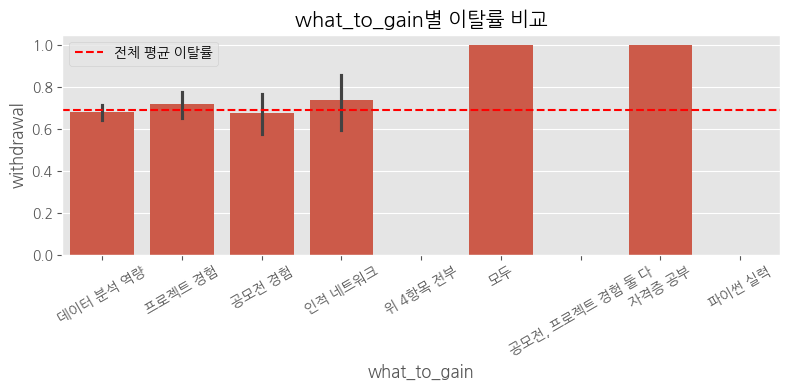

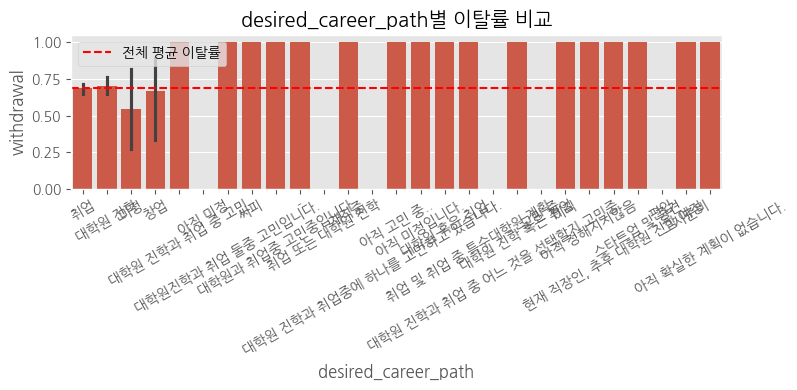

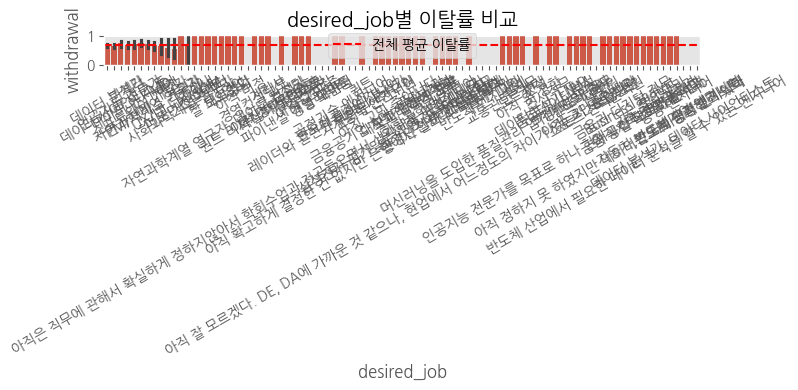

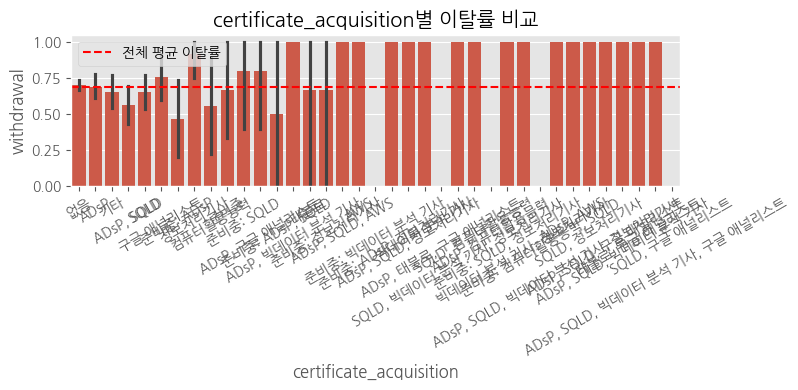

/tmp/ipykernel_5732/460533477.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


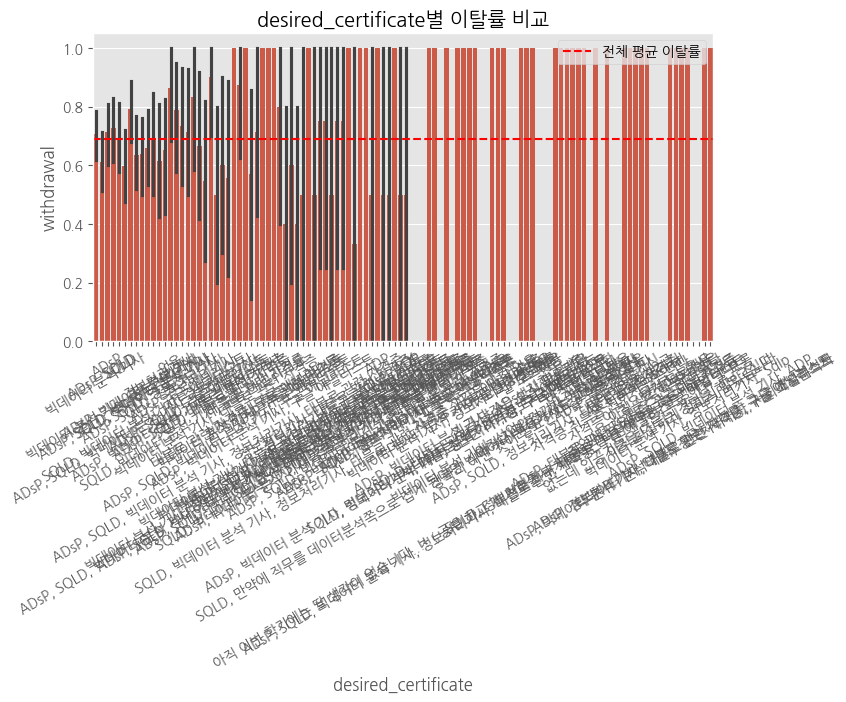

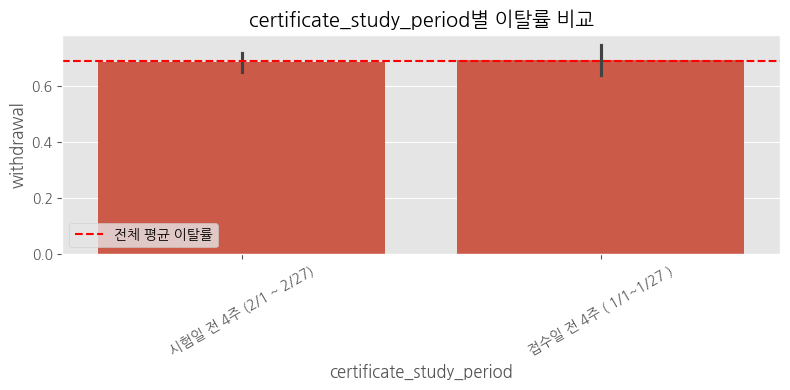

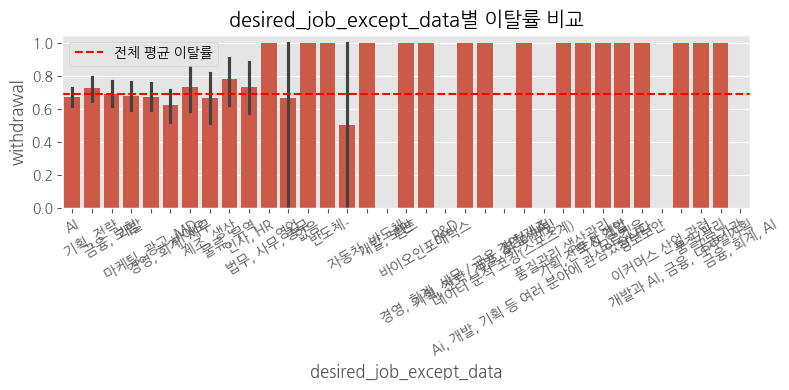

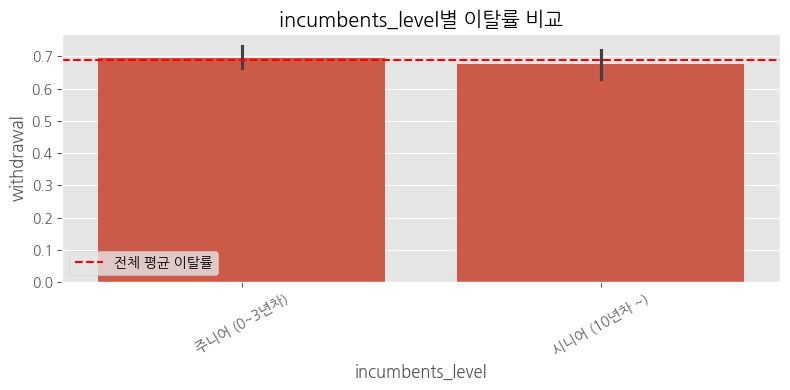

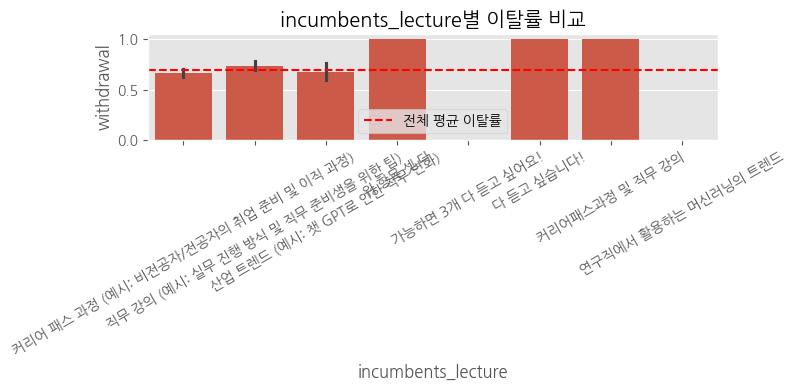

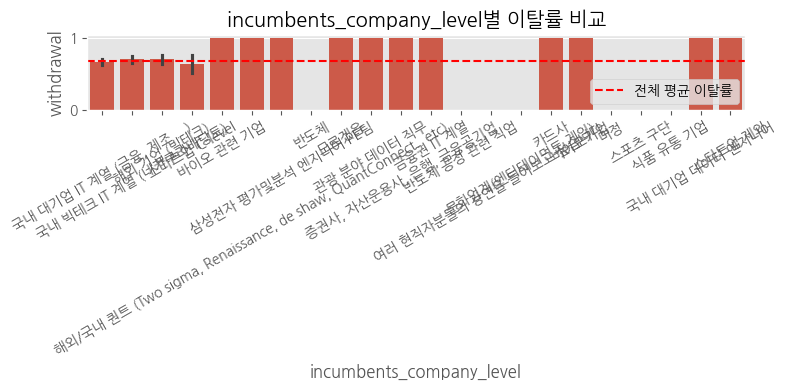

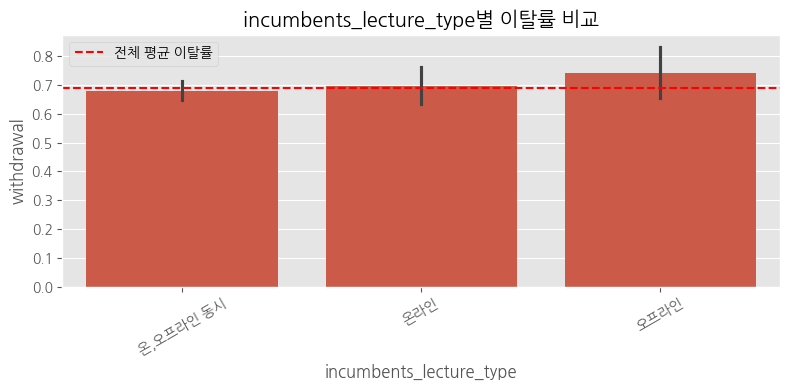

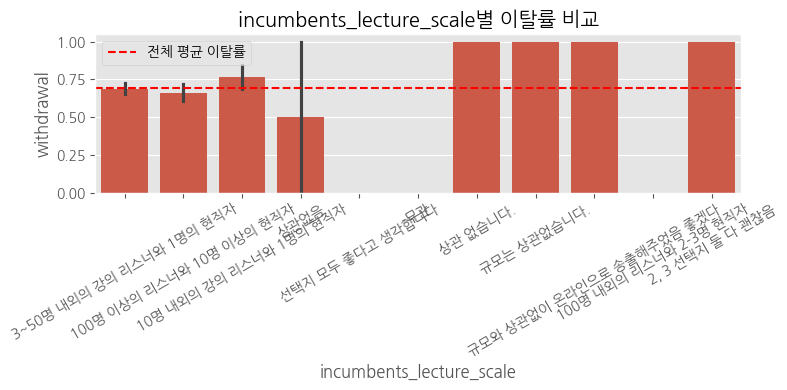

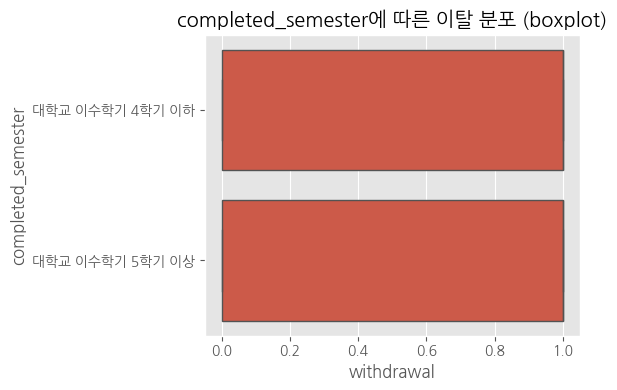

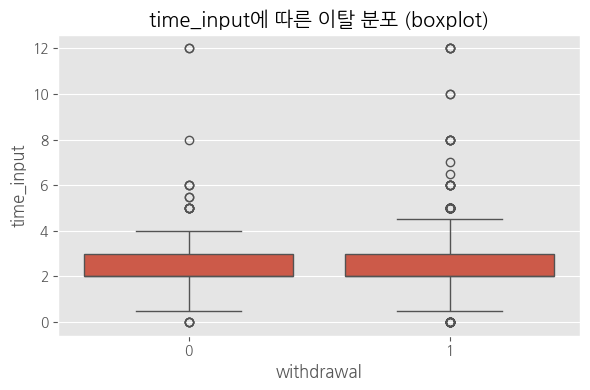

In [34]:
# 시각화용 데이터 (원본과 같은 구조로)
viz_df = train_df.copy()

# 시각화 함수 정의
def plot_bar_with_churn(df, column, figsize=(8, 4), rotate=30):
    plt.figure(figsize=figsize)
    order = df[column].value_counts().index
    sns.barplot(data=df, x=column, y='withdrawal', order=order)
    plt.axhline(df['withdrawal'].mean(), color='red', linestyle='--', label='전체 평균 이탈률')
    plt.xticks(rotation=rotate)
    plt.title(f"{column}별 이탈률 비교")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 시각화 실행 (텍스트/범주형 위주)
plot_bar_with_churn(viz_df, 'what_to_gain')
plot_bar_with_churn(viz_df, 'desired_career_path')
plot_bar_with_churn(viz_df, 'desired_job')
plot_bar_with_churn(viz_df, 'certificate_acquisition')
plot_bar_with_churn(viz_df, 'desired_certificate')
plot_bar_with_churn(viz_df, 'certificate_study_period')
plot_bar_with_churn(viz_df, 'desired_job_except_data')
plot_bar_with_churn(viz_df, 'incumbents_level')
plot_bar_with_churn(viz_df, 'incumbents_lecture')
plot_bar_with_churn(viz_df, 'incumbents_company_level')
plot_bar_with_churn(viz_df, 'incumbents_lecture_type')
plot_bar_with_churn(viz_df, 'incumbents_lecture_scale')

# 수치형 변수 이탈률 boxplot 시각화
def plot_box_with_churn(df, column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='withdrawal', y=column)
    plt.title(f"{column}에 따른 이탈 분포 (boxplot)")
    plt.tight_layout()
    plt.show()

plot_box_with_churn(viz_df, 'completed_semester')
plot_box_with_churn(viz_df, 'time_input')


what_to_gain : BDA에서 얻고싶은 것
desired_career_path : 희망 진로
completed_semester : 대학교 이수학기
time_input 
desired_job 


certificate_acquisition : 취득한 자격증
desired_certificate : 취득을 희망하는 자격증
certificate_study_period : 원하는 자격증 스터디 기간
--> 의미가 있을까?

desired_job_except_data : 데이터 외 희망 직무  의미 있을거같고

incumbents_level : 어느 정도 연차의 현직자를 원하는지
--> 의미?

incumbents_lecture : 어떤 주제의 현직자 강의를 원하는지
--> 수준 볼 수 있어서 의미 있을거 같음 
incumbents_company_level : 강연 현직자가 어느정도 규모의 회사를 다니는 사람이었으면 좋겠는지
--> 의미?

incumbents_lecture_type : 온, 오프라인 중 원하는 현직자 강연 형태
-> 오프라인이 더 이탈자가 적을거 같은 느낌 
incumbents_lecture_scale : 원하는 현직자 강의 규모
-> 작을 수록 이탈자가 더 적을거 같은 느낌

# 감정분석

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="WhitePeak/bert-base-cased-Korean-sentiment")

def analyze_sentiment(text):
    if text.strip() == "":
        return 0
    try:
        result = classifier(text[:512])[0]
        return result['score'] if result['label'] == 'LABEL_1' else -result['score']
    except:
        return 0

train_df['sentiment_score'] = train_df['incumbents_lecture_scale_reason'].fillna("").apply(analyze_sentiment)


Device set to use cpu


In [213]:
train_df['major type']

0                         단일 전공
1       복수 전공 ( 다중전공, 이중전공 포함 )
2                         단일 전공
3                         단일 전공
4       복수 전공 ( 다중전공, 이중전공 포함 )
                 ...           
1047    복수 전공 ( 다중전공, 이중전공 포함 )
1048                      단일 전공
1049    복수 전공 ( 다중전공, 이중전공 포함 )
1050                      단일 전공
1051    복수 전공 ( 다중전공, 이중전공 포함 )
Name: major type, Length: 1052, dtype: object

In [215]:
# 1. major type 결측값 → '고졸'로 대체
train_df['major type'] = train_df['major type'].fillna('고졸')

# 2. major type 값이 '고졸', '단일전공', '복수전공'만 존재하도록 제한 (혹시 이상치 있으면 기타 처리 가능)
valid_major_types = ['고졸', '단일전공', '복수전공']
train_df['major type'] = train_df['major type'].apply(lambda x: x if x in valid_major_types else '기타')

# 3. major type 원핫 인코딩
major_type_ohe = pd.get_dummies(train_df['major type'], prefix='major_type')
train_df = pd.concat([train_df, major_type_ohe], axis=1)

# 4. re_registration을 원핫 인코딩
re_reg_ohe = pd.get_dummies(train_df['re_registration'], prefix='re_registration')
train_df = pd.concat([train_df, re_reg_ohe], axis=1)

# 5. 원본 컬럼 제거 (선택)
train_df.drop(columns=['major type', 're_registration'], inplace=True)


In [211]:
train_df.iloc[464,2] = False

In [37]:
train_df[train_df.sentiment_score > 0].sentiment_score.count()

np.int64(669)

In [214]:
train_df.re_registration.unique()

array(['아니요', '예'], dtype=object)

In [134]:
train_df[train_df.nationality == "외국인"]

,ID,major type,major1_1,major1_2,major_data,job,re_registration,nationality,inflow_route,whyBDA,...,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,onedayclass_topic,withdrawal,sentiment_score
178,TRAIN_0178,단일 전공,인문학,NaN,False,대학생,아니요,외국인,에브리타임,혼자 공부하기 어려워서,...,커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),해외 기업 (빅테크),온라인,3~50명 내외의 강의 리스너와 1명의 현직자,진행이 잘 될 것 같아서,구글,비즈니스,아직 모르겠습니다,1,0.971208
362,TRAIN_0362,단일 전공,IT(컴퓨터 공학 포함),NaN,True,대학생,아니요,외국인,에브리타임,혼자 공부하기 어려워서,...,산업 트렌드 (예시: 챗 GPT로 인한 직무 변화),해외 기업 (빅테크),"온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 적으면 부담스럽고 많으면 집중이 안 될거 같아서요,"데이터 사이언티스트/분석가, 인공지능 연구자",의료/헬스케어,통계 이론,1,-0.986533
694,TRAIN_0694,단일 전공,자연과학,NaN,True,대학원생,아니요,외국인,에브리타임,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",...,커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",100명 이상의 리스너와 10명 이상의 현직자,리스너 인원은 장소만 잘 제공되면 되는 것 같고 다양한 분야의 현직자를 만나고 정보...,"신용평가사, 카드사, sk하이닉스, 네이버",금융,C언어,1,0.926829
855,TRAIN_0855,"복수 전공 ( 다중전공, 이중전공 포함 )",경제통상학,자연과학,False,대학생,아니요,외국인,인스타그램,혼자 공부하기 어려워서,...,직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",10명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있어서,"구글, 골드만삭스",금융,금융관련 데이터분석,1,-0.701395


In [ ]:
train_df.select_dtypes(include="object")[:6].head(3)

In [185]:
import pandas as pd

In [186]:
df = pd.read_csv("train_ms2.csv")

In [190]:
pd.get_dummies(df['re_registration'], prefix=prefix)
df.drop(columns={"re_registration"})

0       아니요
1       아니요
2       아니요
3       아니요
4       아니요
       ... 
1047    아니요
1048      예
1049    아니요
1050    아니요
1051    아니요
Name: re_registration, Length: 1052, dtype: object

In [199]:
df

,major type,major_data,re_registration,withdrawal,is_double_major,major_field_IT (컴퓨터 공학 포함),"major_field_IT (컴퓨터 공학 포함), 경영학","major_field_IT (컴퓨터 공학 포함), 경제통상학","major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)","major_field_IT (컴퓨터 공학 포함), 사회과학",...,job_기타,job_데이터/AI,job_마케팅/기획,job_미정,job_엔지니어/개발,interested_company_bool,expected_domain_bool,lecture_type_오프라인,"lecture_type_온,오프라인 동시",lecture_type_온라인
0,단일 전공,False,아니요,1,0,False,False,False,False,False,...,False,True,False,False,False,1,1,False,True,False
1,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,1,1,True,False,False,False,False,...,True,False,False,False,False,1,1,False,True,False
2,단일 전공,True,아니요,1,0,True,False,False,False,False,...,False,True,False,False,False,1,1,False,True,False
3,단일 전공,True,아니요,0,0,False,False,False,False,False,...,False,True,False,False,False,1,1,False,True,False
4,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,1,1,False,False,False,False,False,...,False,True,False,False,False,1,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,1,1,False,False,True,False,False,...,False,True,False,False,False,1,1,False,True,False
1048,단일 전공,True,예,1,0,True,False,False,False,False,...,False,True,False,False,False,1,1,False,True,False
1049,"복수 전공 ( 다중전공, 이중전공 포함 )",False,아니요,0,1,False,False,False,False,False,...,False,True,False,False,False,1,1,False,False,True
1050,단일 전공,False,아니요,1,0,False,False,False,False,False,...,False,True,False,False,False,1,1,False,True,False


In [204]:
df.isnull().sum().to_list()

[7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [200]:
df['major type'].value_counts()

major type
단일 전공                      580
복수 전공 ( 다중전공, 이중전공 포함 )    465
Name: count, dtype: int64

In [198]:
df.drop(columns={"ID"},inplace=True)

In [ ]:
desired_career_path
major1_1,2
major_field
time_input
incumbents_lecture
incumbents_lecture_type
job 

In [21]:
col = train.whyBDA.unique()
col

array(['BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)',
       '혼자 공부하기 어려워서', '현직자의 강의를 듣고 싶어서', '학회 가입 시 코딩 테스트, 면접 등을 보지 않아서',
       '시간적으로 부담이 없어서', '이전 기수에 매우 만족해서',
       '큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서'], dtype=object)

In [222]:
train_df.drop(columns={"incumbents_lecture_cleaned"},inplace=True)

In [221]:
train_df.columns

Index(['major_data', 'withdrawal', 'is_double_major',
       'major_field_IT (컴퓨터 공학 포함)', 'major_field_IT (컴퓨터 공학 포함), 경영학',
       'major_field_IT (컴퓨터 공학 포함), 경제통상학',
       'major_field_IT (컴퓨터 공학 포함), 공학 (컴퓨터 공학 제외)',
       'major_field_IT (컴퓨터 공학 포함), 사회과학', 'major_field_IT (컴퓨터 공학 포함), 인문학',
       'major_field_IT (컴퓨터 공학 포함), 자연과학', 'major_field_경영학',
       'major_field_경영학, 사회과학', 'major_field_경영학, 인문학', 'major_field_경제통상학',
       'major_field_경제통상학, 사회과학', 'major_field_경제통상학, 인문학',
       'major_field_공학 (컴퓨터 공학 제외)', 'major_field_공학 (컴퓨터 공학 제외), 자연과학',
       'major_field_기타', 'major_field_사회과학', 'major_field_사회과학, 인문학',
       'major_field_인문학', 'major_field_자연과학', 'major_field_자연과학, 사회과학',
       'job_대학생', 'job_대학원생', 'job_직장인', 'job_취준생', 'sentiment_score',
       'except_job_개발/AI/R&D', 'except_job_경영/회계', 'except_job_공공기관',
       'except_job_금융', 'except_job_기타', 'except_job_기획/전략', 'except_job_마케팅',
       'except_job_물류/무역', 'except_job_바이오', 'except_job_없음', 'ex

In [224]:
train_df.select_dtypes(include="object")


""
0
1
2
3
4
...
1047
1048
1049
1050


In [225]:
train_df.to_csv('train_ms_.csv', index=False, encoding='utf-8-sig')

In [ ]:
def classify_topic(text):
    if pd.isna(text):
        return "기타"
    if any(kw in text for kw in ['기초', '입문', '초보', '처음',"모른다"]):
        return "기초"
    elif any(kw in text for kw in ['현직자', '취업', '포트폴리오', '회사']):
        return "직무"
    elif any(kw in text for kw in ['모델링', 'SQL', '알고리즘', '데이터']):
        return "기술"
    elif any(kw in text for kw in ['응용', '심화', '실전', '프로젝트']):
        return "고급"
    else:
        return "기타"

train_test=train_df.copy()
train_test['topic_group'] = train_test['onedayclass_topic'].apply(classify_topic)


In [113]:
pd.crosstab(train_test['topic_group'], train_test['withdrawal'], normalize='index')


withdrawal,0,1
topic_group,,
고급,0.386364,0.613636
기술,0.330709,0.669291
기초,0.336898,0.663102
기타,0.291545,0.708455
직무,0.333333,0.666667


In [ ]:
from xgboost import XGBClassifier, plot_importance
model = XGBClassifier()
model.fit(X_train, y_train)
plot_importance(model)

In [12]:
pip install pytorch-tabnet

Note: you may need to restart the kernel to use updated packages.


In [13]:
!pip install pytorch-tabnet
!pip install autogluon.tabular
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [autogluon.tabular]autogluon.tabular]


In [17]:
# deep_tabular_models.ipynb

# ✅ 딥러닝 기반 Tabular 모델 4종 비교 (train.csv 기준)
# - TabNet
# - FT-Transformer (AutoGluon)
# - NODE
# - DNN (with embedding)

# ⚠️ 설치 라이브러리
# !pip install pytorch-tabnet
# !pip install autogluon.tabular
# !pip install category_encoders

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score

# 1. 데이터 로드
train_df = pd.read_csv("train.csv")
target_col = "withdrawal"

# ------------------------------
# 2. 데이터 전처리
# ------------------------------

# 수치형 / 범주형 분리
num_cols = train_df.select_dtypes(include=[np.number, bool]).columns.tolist()
cat_cols = train_df.select_dtypes(include=["object", "category"]).columns.tolist()

num_cols.remove(target_col) if target_col in num_cols else None

X = train_df.drop(columns=[target_col])
y = train_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# ------------------------------
# 4. FT-Transformer (AutoGluon)
# ------------------------------

from autogluon.tabular import TabularPredictor

ag_train = X_train.copy()
ag_train[target_col] = y_train

predictor = TabularPredictor(label=target_col).fit(ag_train, verbosity=0)

ag_preds = predictor.predict(X_test)

print("\n[AutoGluon (FT-Transformer) Results]")
print("Accuracy:", accuracy_score(y_test, ag_preds))
print("F1 Score:", f1_score(y_test, ag_preds))
print("Recall:", recall_score(y_test, ag_preds))

# ------------------------------
# 5. NODE (유사 구조, 트리형 DNN)
# ------------------------------

# 대체 구조로 LightGBM + NeuralNet hybrid 가능 (옵션)
# 실제 NODE 구현은 러시아 Yandex 오픈소스 참조 필요



No path specified. Models will be saved in: "AutogluonModels/ag-20250710_080214"
		`import lightgbm` failed. A quick tip is to install via `pip install autogluon.tabular[lightgbm]==1.3.1`.
		`import lightgbm` failed. A quick tip is to install via `pip install autogluon.tabular[lightgbm]==1.3.1`.
		`import catboost` failed. A quick tip is to install via `pip install autogluon.tabular[catboost]==1.3.1`.
		Import fastai failed. A quick tip is to install via `pip install autogluon.tabular[fastai]==1.3.1`. 
		`import lightgbm` failed. A quick tip is to install via `pip install autogluon.tabular[lightgbm]==1.3.1`.



[AutoGluon (FT-Transformer) Results]
Accuracy: 0.6933962264150944
F1 Score: 0.8071216617210683
Recall: 0.9251700680272109


/tmp/ipykernel_1397/3437043853.py:19: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/3437043853.py:19: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/3437043853.py:19: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/3437043853.py:19: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/3437043853.py:19: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/3437043853.py:19: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/3437043853.py:19: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1397/3437043853.py:19: 

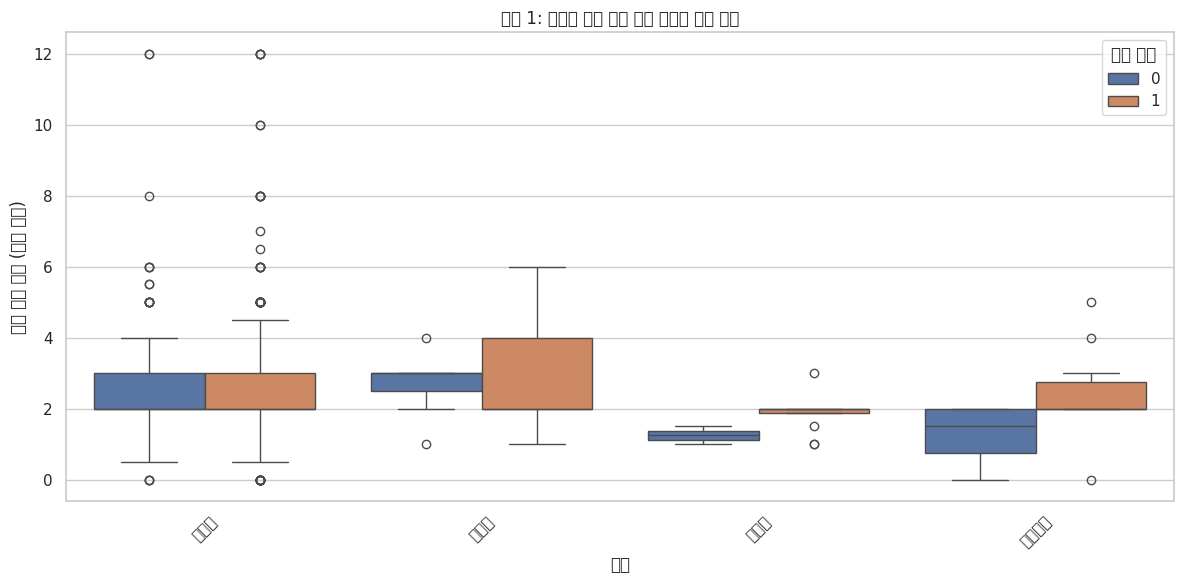